In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder

In [2]:
df = pd.read_csv('dataset.csv')
df = shuffle(df, random_state = 42)
df.head()

Disease        Symptom_1            Symptom_2  \
373                  Acne        skin_rash           blackheads   
4916                 Acne        skin_rash   pus_filled_pimples   
1550      Hyperthyroidism          fatigue          mood_swings   
3081                 AIDS   muscle_wasting    patches_in_throat   
3857  Chronic cholestasis          itching             vomiting   

            Symptom_3                Symptom_4          Symptom_5  \
373          scurring                      NaN                NaN   
4916       blackheads                 scurring                NaN   
1550      weight_loss             restlessness           sweating   
3081       high_fever   extra_marital_contacts                NaN   
3857   yellowish_skin                   nausea   loss_of_appetite   

            Symptom_6           Symptom_7          Symptom_8  \
373               NaN                 NaN                NaN   
4916              NaN                 NaN                NaN   
1550        diarrhoea     fast_heart_rate   excessive_hunger   
3081              NaN                 NaN                NaN   
3857   abdominal_pain   yellowing_of_eyes                NaN   

             Symptom_9     Symptom_10              Symptom_11 Symptom_12  \
373                NaN            NaN                     NaN        NaN   
4916               NaN            NaN                     NaN        NaN   
1550   muscle_weakness   irritability   abnormal_menstruation        NaN   
3081               NaN            NaN                     NaN        NaN   
3857               NaN            NaN                     NaN        NaN   

     Symptom_13 Symptom_14 Symptom_15 Symptom_16 Symptom_17  
373         NaN        NaN        NaN        NaN        NaN  
4916        NaN        NaN        NaN        NaN        NaN  
1550        NaN        NaN        NaN        NaN        NaN  
3081        NaN        NaN        NaN        NaN        NaN  
3857        NaN        NaN        NaN        NaN        NaN

In [3]:
# to Describe the dataset
df.describe()
   

Disease  Symptom_1  Symptom_2 Symptom_3    Symptom_4  Symptom_5  \
count     4920       4920       4920      4920         4572       3714   
unique      41         34         48        54           50         38   
top       Acne   vomiting   vomiting   fatigue   high_fever   headache   
freq       120        822        870       726          378        348   

       Symptom_6        Symptom_7        Symptom_8           Symptom_9  \
count       2934             2268             1944                1692   
unique        32               26               21                  22   
top       nausea   abdominal_pain   abdominal_pain   yellowing_of_eyes   
freq         390              264              276                 228   

                Symptom_10     Symptom_11 Symptom_12         Symptom_13  \
count                 1512           1194        744                504   
unique                  21             18         11                  8   
top      yellowing_of_eyes   irritability    malaise   stomach_bleeding   
freq                   198            120        126                 72   

         Symptom_14   Symptom_15      Symptom_16    Symptom_17  
count           306          240             192            72  
unique            4            3               3             1  
top      chest_pain   chest_pain   loss_of_smell   muscle_pain  
freq             96          144              72            72

#### ALL THE DIFFERENT TARGET VARIABLE

In [4]:
# all tagert variable 
li = df['Disease'].values.tolist()
li = set(li)
print(li)

{'Psoriasis', 'Typhoid', 'Osteoarthristis', '(vertigo) Paroymsal  Positional Vertigo', 'Impetigo', 'Hypoglycemia', 'Bronchial Asthma', 'Jaundice', 'Malaria', 'Paralysis (brain hemorrhage)', 'Hepatitis E', 'Alcoholic hepatitis', 'Varicose veins', 'Fungal infection', 'Arthritis', 'Gastroenteritis', 'Hepatitis B', 'Peptic ulcer diseae', 'Dengue', 'Urinary tract infection', 'AIDS', 'Chicken pox', 'Cervical spondylosis', 'Chronic cholestasis', 'Hypothyroidism', 'hepatitis A', 'Hepatitis C', 'Tuberculosis', 'Hypertension ', 'GERD', 'Dimorphic hemmorhoids(piles)', 'Diabetes ', 'Migraine', 'Allergy', 'Acne', 'Pneumonia', 'Common Cold', 'Heart attack', 'Drug Reaction', 'Hyperthyroidism', 'Hepatitis D'}


#FIND ALL NULL VALUES IN THE DATASET   >>  

<pre>these null value need to be handeled ->>
in this case we can just replace null by 0 because the null value do not effect the prediction it will be teated as empty column<pre>

In [5]:
df.isnull().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

In [6]:
# made changes in data 
for col in df.columns:
    df[col] = df[col].str.replace('_', ' ')

In [7]:
#to display all the values of the in bargraph we replace NaN with NULL str.....
# New Dataframe  
df2 = df.fillna("NULL")
df2.head()

Disease        Symptom_1            Symptom_2  \
373                  Acne        skin rash           blackheads   
4916                 Acne        skin rash   pus filled pimples   
1550      Hyperthyroidism          fatigue          mood swings   
3081                 AIDS   muscle wasting    patches in throat   
3857  Chronic cholestasis          itching             vomiting   

            Symptom_3                Symptom_4          Symptom_5  \
373          scurring                     NULL               NULL   
4916       blackheads                 scurring               NULL   
1550      weight loss             restlessness           sweating   
3081       high fever   extra marital contacts               NULL   
3857   yellowish skin                   nausea   loss of appetite   

            Symptom_6           Symptom_7          Symptom_8  \
373              NULL                NULL               NULL   
4916             NULL                NULL               NULL   
1550        diarrhoea     fast heart rate   excessive hunger   
3081             NULL                NULL               NULL   
3857   abdominal pain   yellowing of eyes               NULL   

             Symptom_9     Symptom_10              Symptom_11 Symptom_12  \
373               NULL           NULL                    NULL       NULL   
4916              NULL           NULL                    NULL       NULL   
1550   muscle weakness   irritability   abnormal menstruation       NULL   
3081              NULL           NULL                    NULL       NULL   
3857              NULL           NULL                    NULL       NULL   

     Symptom_13 Symptom_14 Symptom_15 Symptom_16 Symptom_17  
373        NULL       NULL       NULL       NULL       NULL  
4916       NULL       NULL       NULL       NULL       NULL  
1550       NULL       NULL       NULL       NULL       NULL  
3081       NULL       NULL       NULL       NULL       NULL  
3857       NULL       NULL       NULL       NULL       NULL

In [8]:
# no of unique values ....
df.nunique(axis=0)

Disease       41
Symptom_1     34
Symptom_2     48
Symptom_3     54
Symptom_4     50
Symptom_5     38
Symptom_6     32
Symptom_7     26
Symptom_8     21
Symptom_9     22
Symptom_10    21
Symptom_11    18
Symptom_12    11
Symptom_13     8
Symptom_14     4
Symptom_15     3
Symptom_16     3
Symptom_17     1
dtype: int64

In [9]:
#print the unique values ....
for col in df.columns[1:]:
    print(col)
    print(df[col].unique())

Symptom_1
[' skin rash' ' fatigue' ' muscle wasting' 'itching' ' headache'
 ' vomiting' ' muscle weakness' ' acidity' ' burning micturition'
 ' joint pain' ' constipation' ' back pain' ' continuous sneezing'
 ' chills' ' chest pain' ' patches in throat' ' stomach pain' ' cramps'
 ' weakness in limbs' ' cough' ' pus filled pimples' ' breathlessness'
 ' sunken eyes' ' weight gain' ' pain during bowel movements' ' neck pain'
 ' yellowish skin' ' stiff neck' ' mood swings' ' high fever'
 ' bladder discomfort' ' shivering' ' indigestion' ' weight loss']
Symptom_2
[' blackheads' ' pus filled pimples' ' mood swings' ' patches in throat'
 ' vomiting' ' chest pain' ' fatigue' ' stiff neck' ' indigestion'
 ' bladder discomfort' ' weight loss' ' joint pain' ' yellowish skin'
 ' pain during bowel movements' ' weakness in limbs' ' cough' ' shivering'
 ' weight gain' ' dehydration' ' cramps' ' skin rash' ' headache'
 ' dizziness' ' sunken eyes' ' breathlessness' ' chills' ' high fever'
 ' cold hands

#### PLOTTING ALL THE DIFFERENT SYMPTOMS UNIQUE ITEM COUNT
(PS :: null repesent empty values)

Symptom_1


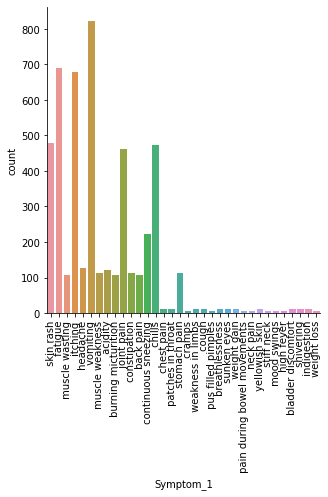

Symptom_2


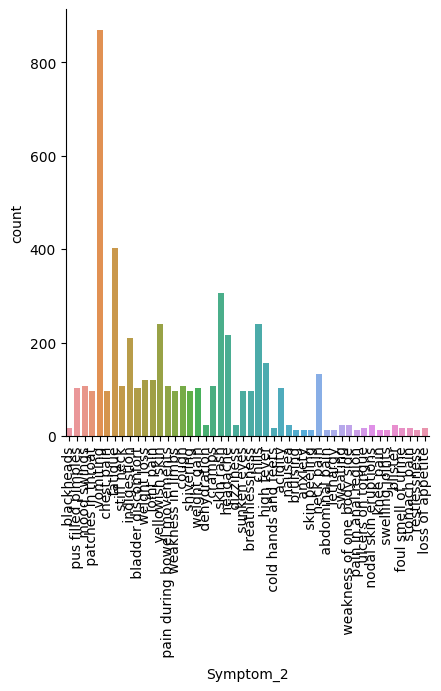

Symptom_3


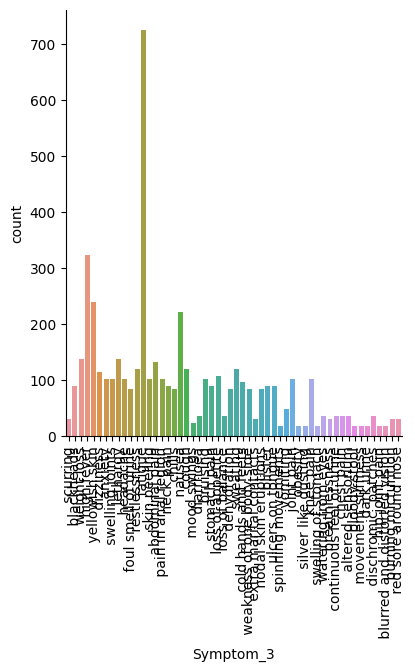

Symptom_4


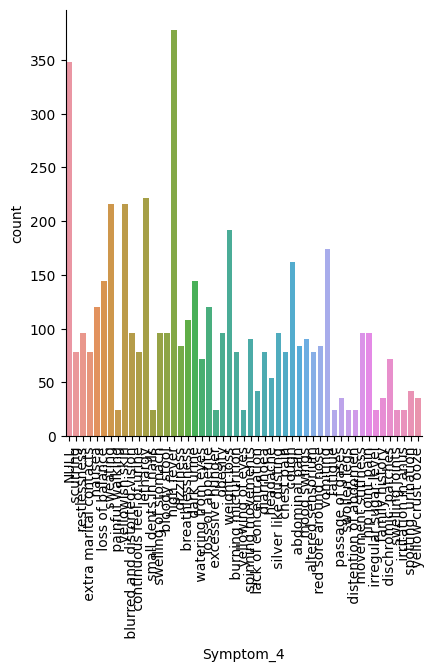

Symptom_5


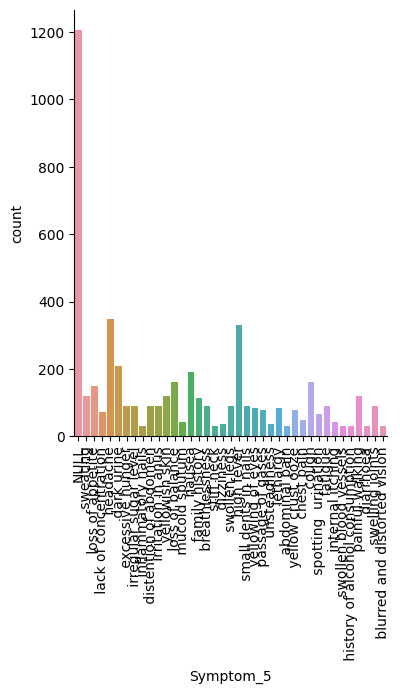

Symptom_6


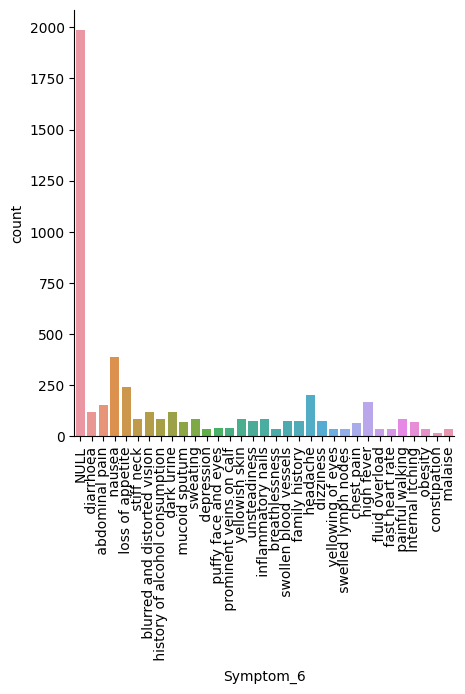

Symptom_7


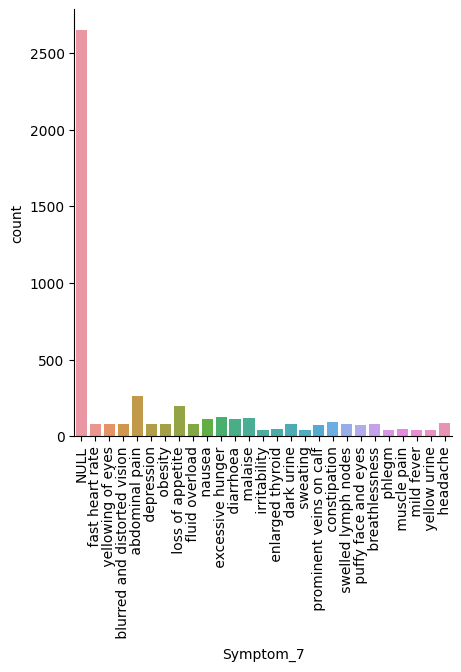

Symptom_8


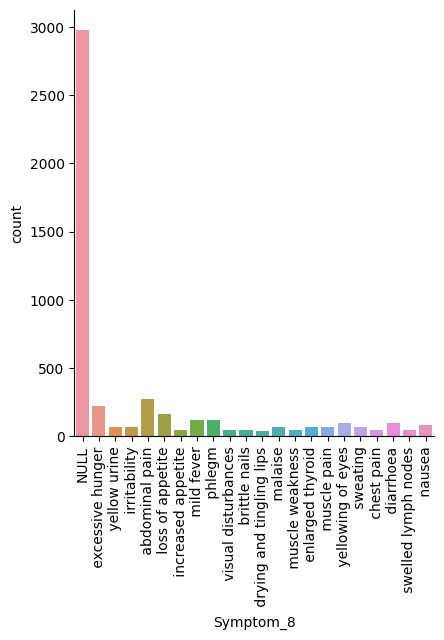

Symptom_9


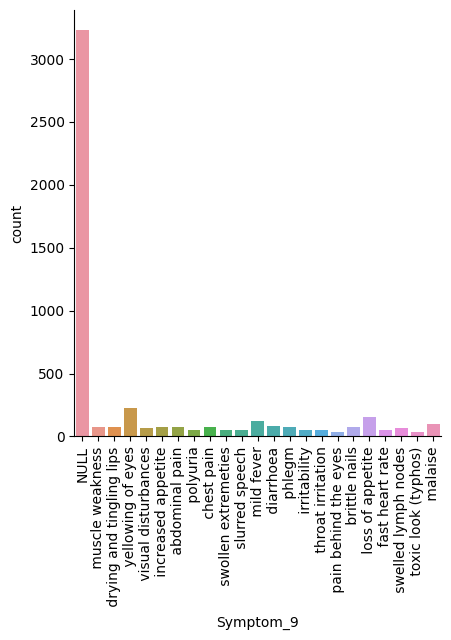

Symptom_10


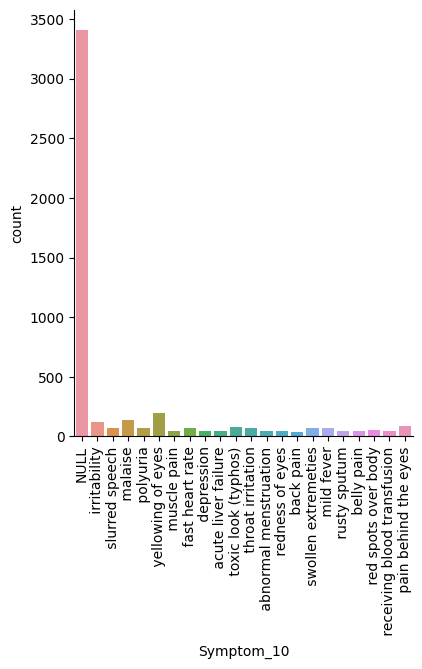

Symptom_11


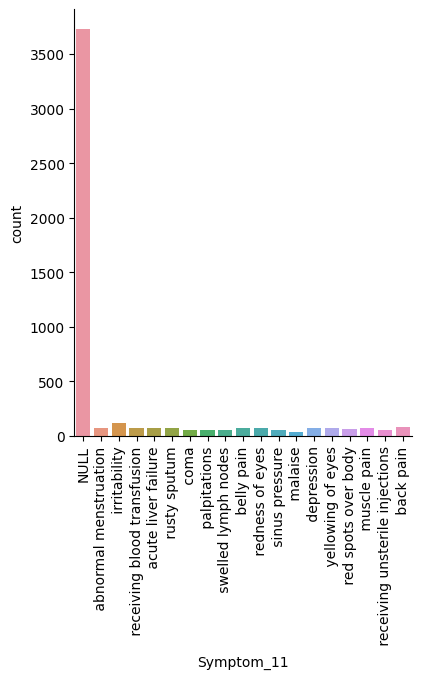

Symptom_12


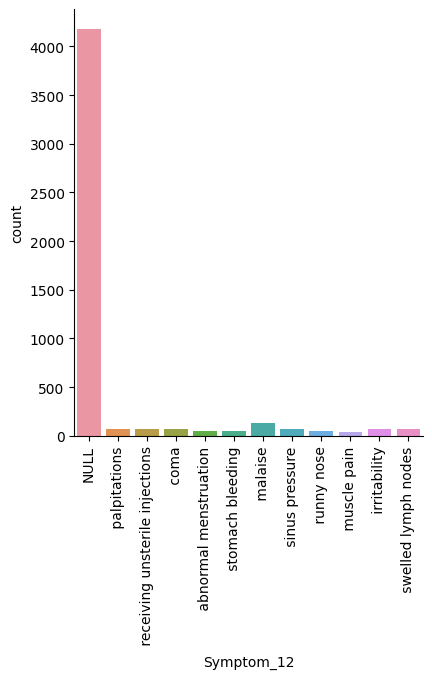

Symptom_13


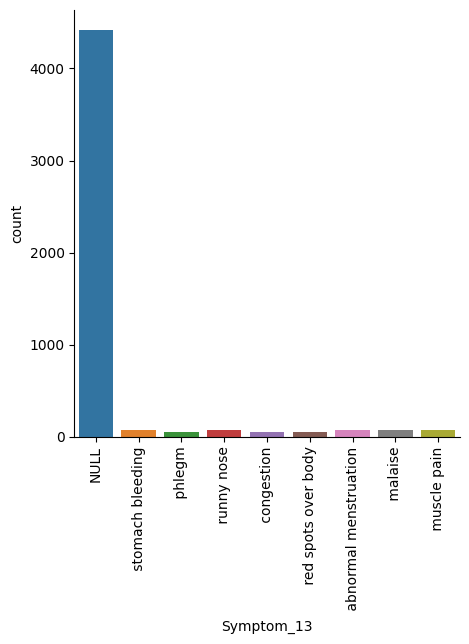

Symptom_14


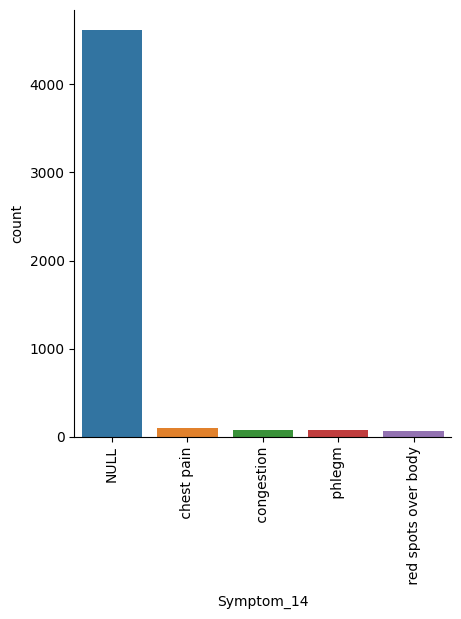

Symptom_15


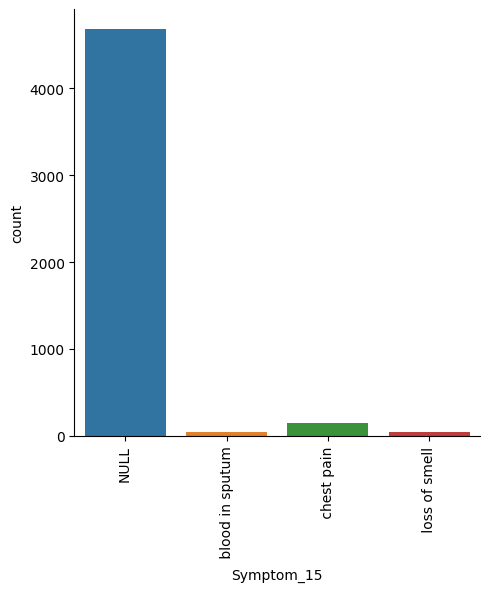

Symptom_16


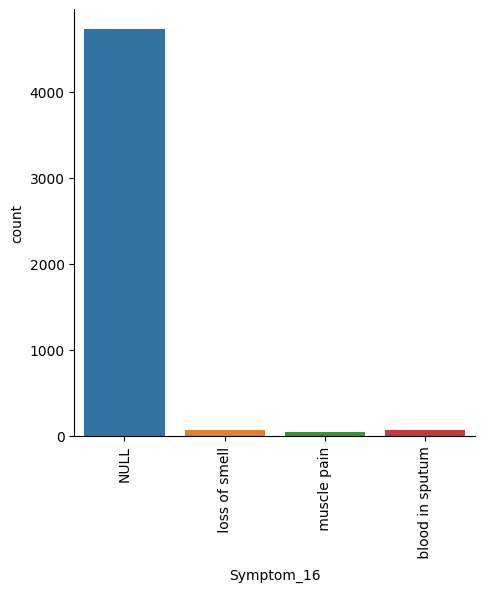

Symptom_17


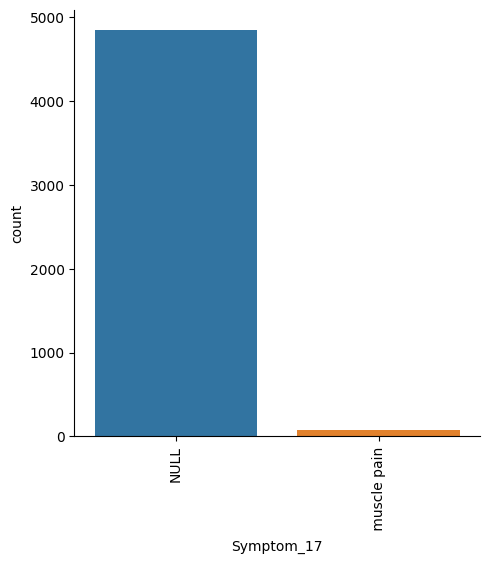

In [10]:
#display all the symptons ......
for col in df2.columns[1:]:
    print(col)
    sns.catplot(x=col , kind="count",data=df2)
    plt.xticks(rotation='vertical')
    plt.show()

In [11]:
df.describe()

Disease  Symptom_1  Symptom_2 Symptom_3    Symptom_4  Symptom_5  \
count     4920       4920       4920      4920         4572       3714   
unique      41         34         48        54           50         38   
top       Acne   vomiting   vomiting   fatigue   high fever   headache   
freq       120        822        870       726          378        348   

       Symptom_6        Symptom_7        Symptom_8           Symptom_9  \
count       2934             2268             1944                1692   
unique        32               26               21                  22   
top       nausea   abdominal pain   abdominal pain   yellowing of eyes   
freq         390              264              276                 228   

                Symptom_10     Symptom_11 Symptom_12         Symptom_13  \
count                 1512           1194        744                504   
unique                  21             18         11                  8   
top      yellowing of eyes   irritability    malaise   stomach bleeding   
freq                   198            120        126                 72   

         Symptom_14   Symptom_15      Symptom_16    Symptom_17  
count           306          240             192            72  
unique            4            3               3             1  
top      chest pain   chest pain   loss of smell   muscle pain  
freq             96          144              72            72

In [12]:
df.head()

Disease        Symptom_1            Symptom_2  \
373                  Acne        skin rash           blackheads   
4916                 Acne        skin rash   pus filled pimples   
1550      Hyperthyroidism          fatigue          mood swings   
3081                 AIDS   muscle wasting    patches in throat   
3857  Chronic cholestasis          itching             vomiting   

            Symptom_3                Symptom_4          Symptom_5  \
373          scurring                      NaN                NaN   
4916       blackheads                 scurring                NaN   
1550      weight loss             restlessness           sweating   
3081       high fever   extra marital contacts                NaN   
3857   yellowish skin                   nausea   loss of appetite   

            Symptom_6           Symptom_7          Symptom_8  \
373               NaN                 NaN                NaN   
4916              NaN                 NaN                NaN   
1550        diarrhoea     fast heart rate   excessive hunger   
3081              NaN                 NaN                NaN   
3857   abdominal pain   yellowing of eyes                NaN   

             Symptom_9     Symptom_10              Symptom_11 Symptom_12  \
373                NaN            NaN                     NaN        NaN   
4916               NaN            NaN                     NaN        NaN   
1550   muscle weakness   irritability   abnormal menstruation        NaN   
3081               NaN            NaN                     NaN        NaN   
3857               NaN            NaN                     NaN        NaN   

     Symptom_13 Symptom_14 Symptom_15 Symptom_16 Symptom_17  
373         NaN        NaN        NaN        NaN        NaN  
4916        NaN        NaN        NaN        NaN        NaN  
1550        NaN        NaN        NaN        NaN        NaN  
3081        NaN        NaN        NaN        NaN        NaN  
3857        NaN        NaN        NaN        NaN        NaN

In [13]:
val = df.values

In [14]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

In [15]:
# for col in df.columns:
#     df[col] = le.fit_transform(df[col].astype(str))

In [16]:
df.head()

Disease        Symptom_1            Symptom_2  \
373                  Acne        skin rash           blackheads   
4916                 Acne        skin rash   pus filled pimples   
1550      Hyperthyroidism          fatigue          mood swings   
3081                 AIDS   muscle wasting    patches in throat   
3857  Chronic cholestasis          itching             vomiting   

            Symptom_3                Symptom_4          Symptom_5  \
373          scurring                      NaN                NaN   
4916       blackheads                 scurring                NaN   
1550      weight loss             restlessness           sweating   
3081       high fever   extra marital contacts                NaN   
3857   yellowish skin                   nausea   loss of appetite   

            Symptom_6           Symptom_7          Symptom_8  \
373               NaN                 NaN                NaN   
4916              NaN                 NaN                NaN   
1550        diarrhoea     fast heart rate   excessive hunger   
3081              NaN                 NaN                NaN   
3857   abdominal pain   yellowing of eyes                NaN   

             Symptom_9     Symptom_10              Symptom_11 Symptom_12  \
373                NaN            NaN                     NaN        NaN   
4916               NaN            NaN                     NaN        NaN   
1550   muscle weakness   irritability   abnormal menstruation        NaN   
3081               NaN            NaN                     NaN        NaN   
3857               NaN            NaN                     NaN        NaN   

     Symptom_13 Symptom_14 Symptom_15 Symptom_16 Symptom_17  
373         NaN        NaN        NaN        NaN        NaN  
4916        NaN        NaN        NaN        NaN        NaN  
1550        NaN        NaN        NaN        NaN        NaN  
3081        NaN        NaN        NaN        NaN        NaN  
3857        NaN        NaN        NaN        NaN        NaN

In [17]:
y = df.drop('Disease', axis=1)

### creating dummies
<br/>of the cagorical variable and the conacatinate data with main dataframe



In [18]:
y = pd.get_dummies(y)

In [19]:
# symptoms = []

# for col in df.columns[1:]:
#     symptoms.append(df[col].unique())

# symptoms

In [20]:
y.head()

Symptom_1_ acidity  Symptom_1_ back pain  Symptom_1_ bladder discomfort  \
373                    0                     0                              0   
4916                   0                     0                              0   
1550                   0                     0                              0   
3081                   0                     0                              0   
3857                   0                     0                              0   

      Symptom_1_ breathlessness  Symptom_1_ burning micturition  \
373                           0                               0   
4916                          0                               0   
1550                          0                               0   
3081                          0                               0   
3857                          0                               0   

      Symptom_1_ chest pain  Symptom_1_ chills  Symptom_1_ constipation  \
373                       0                  0                        0   
4916                      0                  0                        0   
1550                      0                  0                        0   
3081                      0                  0                        0   
3857                      0                  0                        0   

      Symptom_1_ continuous sneezing  Symptom_1_ cough  ...  \
373                                0                 0  ...   
4916                               0                 0  ...   
1550                               0                 0  ...   
3081                               0                 0  ...   
3857                               0                 0  ...   

      Symptom_14_ congestion  Symptom_14_ phlegm  \
373                        0                   0   
4916                       0                   0   
1550                       0                   0   
3081                       0                   0   
3857                       0                   0   

      Symptom_14_ red spots over body  Symptom_15_ blood in sputum  \
373                                 0                            0   
4916                                0                            0   
1550                                0                            0   
3081                                0                            0   
3857                                0                            0   

      Symptom_15_ chest pain  Symptom_15_ loss of smell  \
373                        0                          0   
4916                       0                          0   
1550                       0                          0   
3081                       0                          0   
3857                       0                          0   

      Symptom_16_ blood in sputum  Symptom_16_ loss of smell  \
373                             0                          0   
4916                            0                          0   
1550                            0                          0   
3081                            0                          0   
3857                            0                          0   

      Symptom_16_ muscle pain  Symptom_17_ muscle pain  
373                         0                        0  
4916                        0                        0  
1550                        0                        0  
3081                        0                        0  
3857                        0                        0  

[5 rows x 394 columns]

#### There are many commmon columns we need to merge 

In [21]:

for col in y.columns:
    j = col.split('_')[-1]
    y =y.rename(columns={col:j})
    # print(col," ",j)

In [22]:
y.columns.value_counts()
# we have same columns ....

 chest pain                   10
 muscle pain                   8
 malaise                       8
 loss of appetite              8
 abdominal pain                8
                              ..
 weakness of one body side     2
 loss of smell                 2
itching                        1
 muscle wasting                1
 continuous sneezing           1
Length: 131, dtype: int64

##### grouping column of same name

In [23]:
y=y.groupby(level=0, axis=1).sum()

In [24]:
y.head()

abdominal pain   abnormal menstruation   acidity   acute liver failure  \
373                 0                       0         0                     0   
4916                0                       0         0                     0   
1550                0                       1         0                     0   
3081                0                       0         0                     0   
3857                1                       0         0                     0   

       altered sensorium   anxiety   back pain   belly pain   blackheads  \
373                    0         0           0            0            1   
4916                   0         0           0            0            1   
1550                   0         0           0            0            0   
3081                   0         0           0            0            0   
3857                   0         0           0            0            0   

       bladder discomfort  ...   watering from eyes   weakness in limbs  \
373                     0  ...                    0                   0   
4916                    0  ...                    0                   0   
1550                    0  ...                    0                   0   
3081                    0  ...                    0                   0   
3857                    0  ...                    0                   0   

       weakness of one body side   weight gain   weight loss  \
373                            0             0             0   
4916                           0             0             0   
1550                           0             0             1   
3081                           0             0             0   
3857                           0             0             0   

       yellow crust ooze   yellow urine   yellowing of eyes   yellowish skin  \
373                    0              0                   0                0   
4916                   0              0                   0                0   
1550                   0              0                   0                0   
3081                   0              0                   0                0   
3857                   0              0                   1                1   

      itching  
373         0  
4916        0  
1550        0  
3081        0  
3857        1  

[5 rows x 131 columns]

In [25]:
x = df['Disease']

In [26]:
x.shape

(4920,)

In [27]:
y.shape

(4920, 131)

In [28]:
y.isnull().sum()
# 0 null values 
# only 2 posible binary options of the dataframe featues YES /NO

 abdominal pain           0
 abnormal menstruation    0
 acidity                  0
 acute liver failure      0
 altered sensorium        0
                         ..
 yellow crust ooze        0
 yellow urine             0
 yellowing of eyes        0
 yellowish skin           0
itching                   0
Length: 131, dtype: int64

 abnormal menstruation


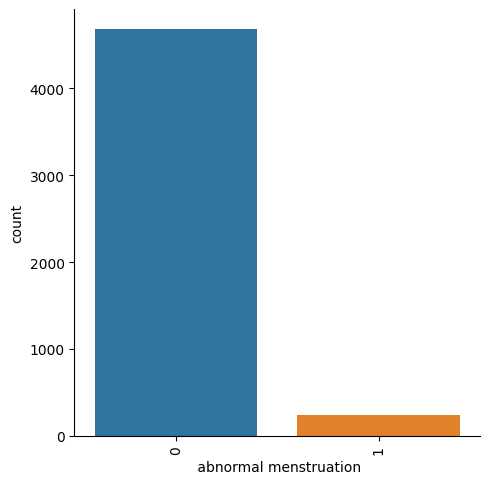

 acidity


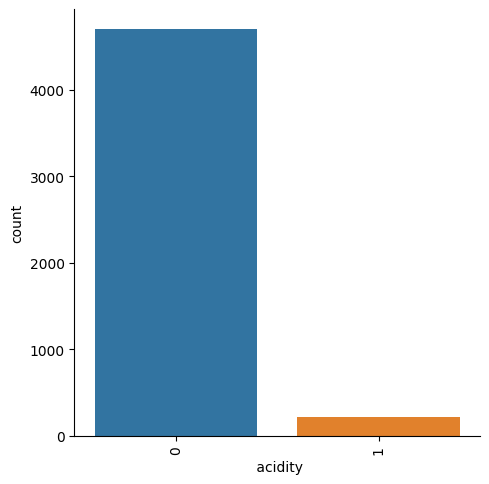

 acute liver failure


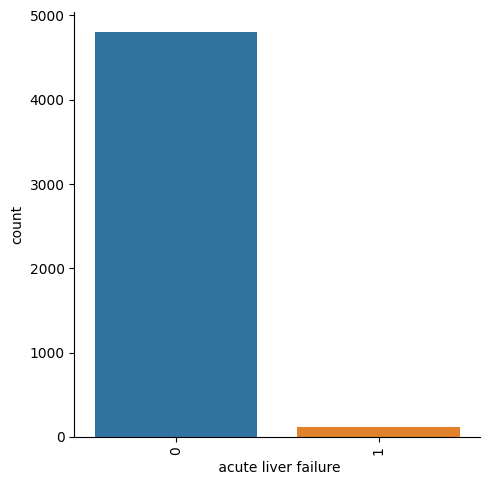

 altered sensorium


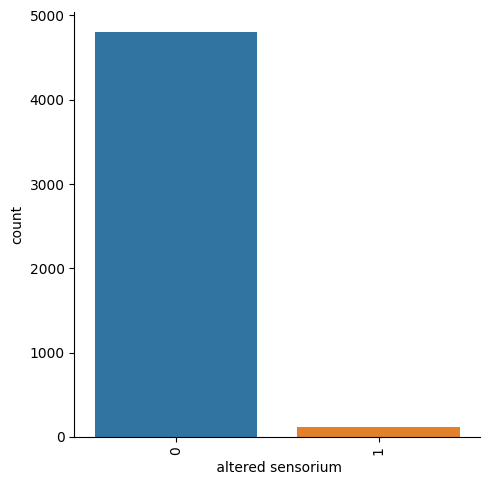

 anxiety


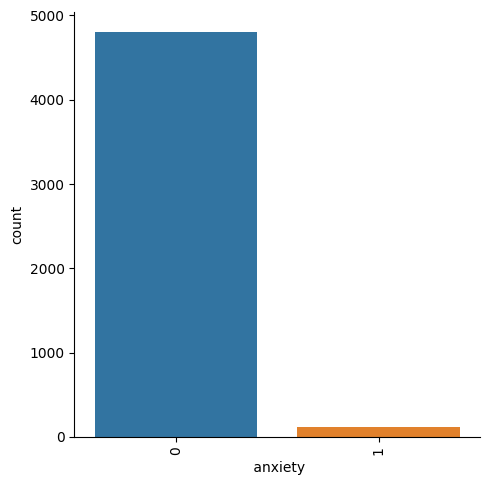

 back pain


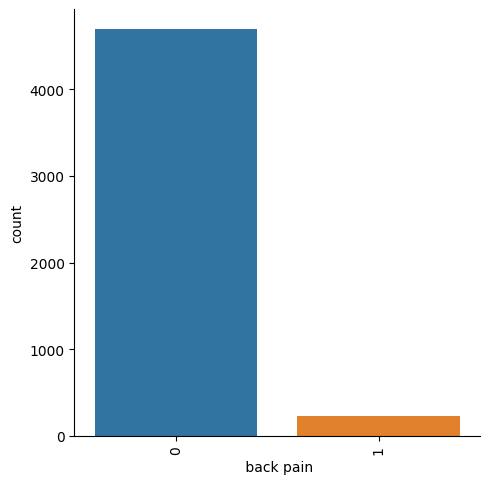

 belly pain


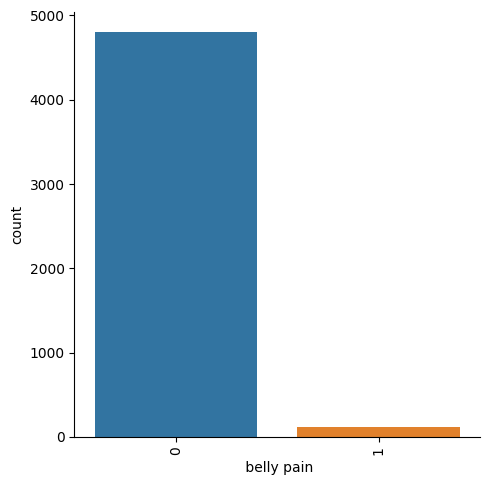

 blackheads


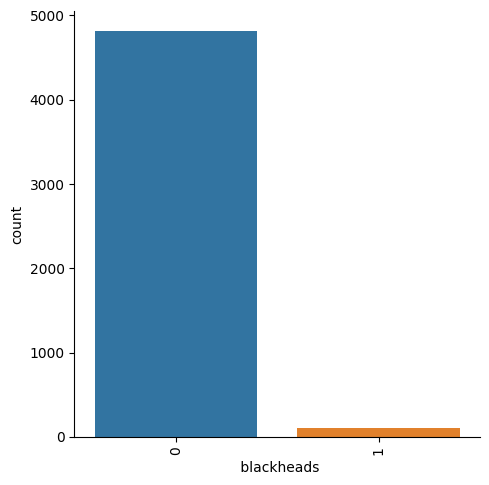

 bladder discomfort


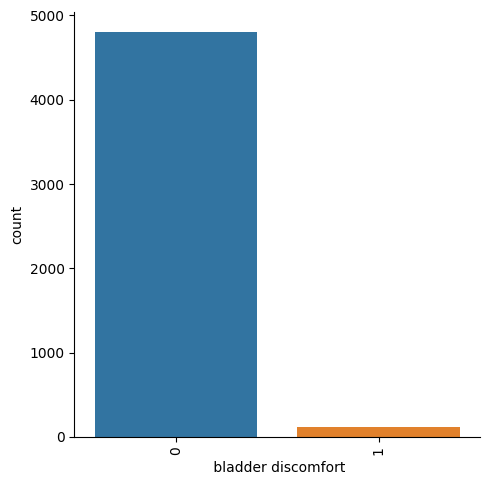

 blister


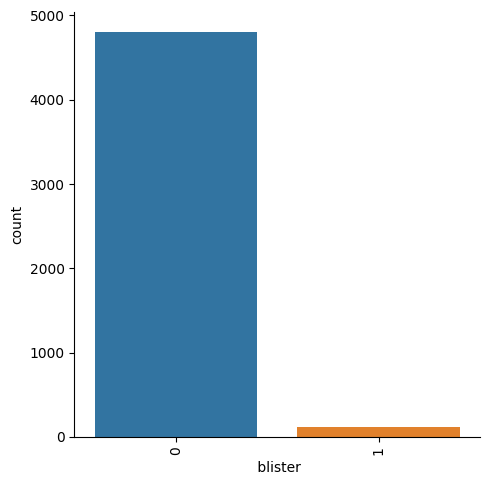

 blood in sputum


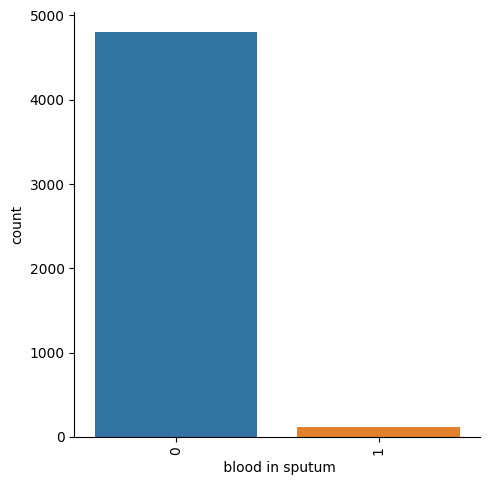

 bloody stool


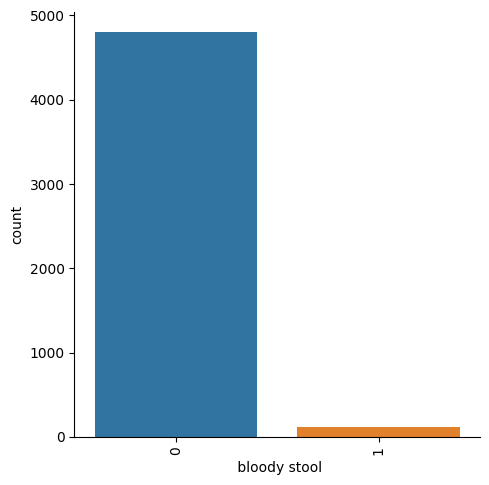

 blurred and distorted vision


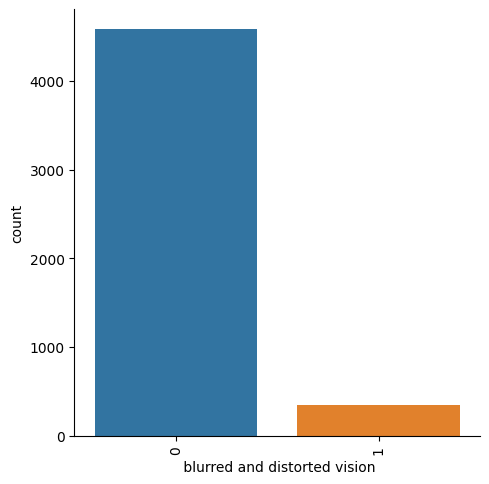

 breathlessness


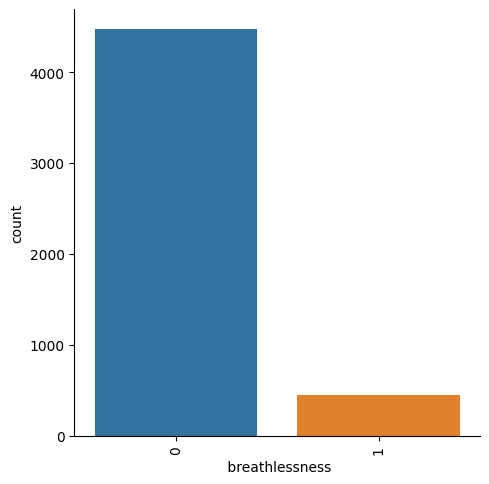

 brittle nails


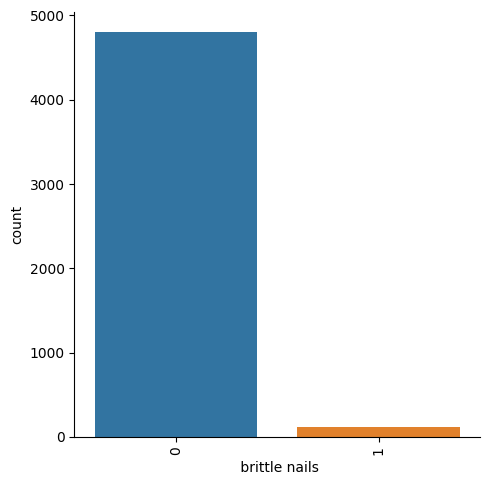

 bruising


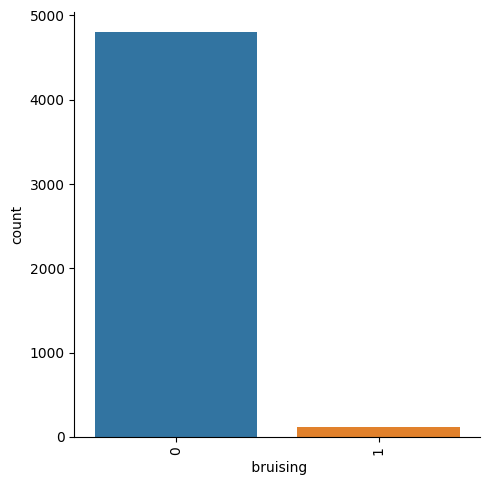

 burning micturition


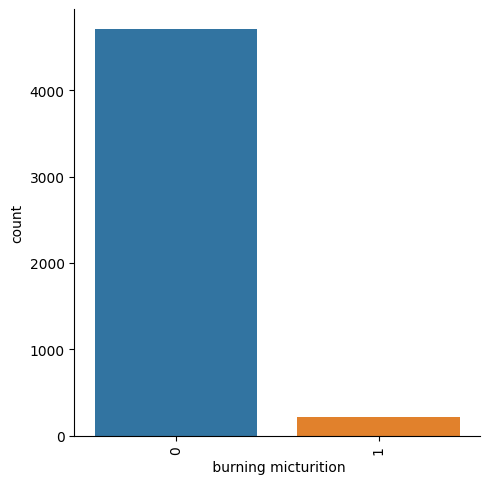

 chest pain


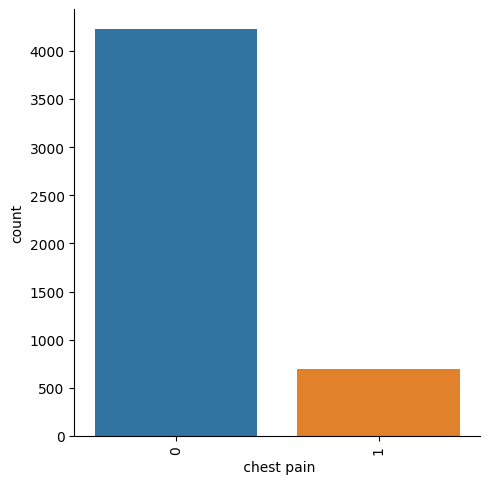

 chills


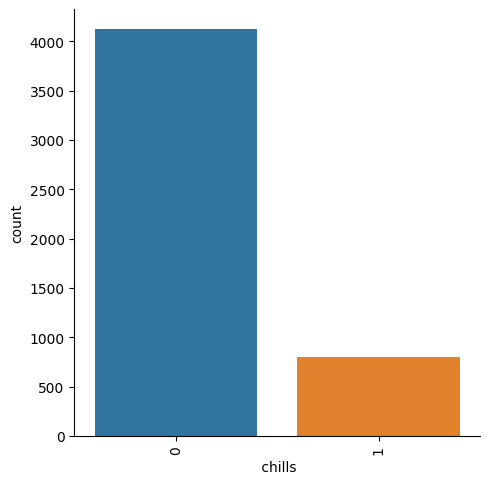

 cold hands and feets


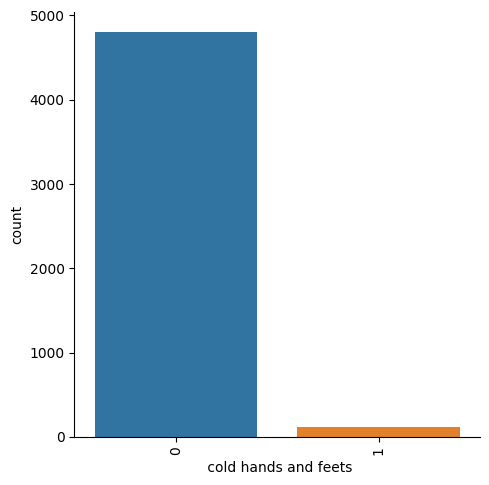

 coma


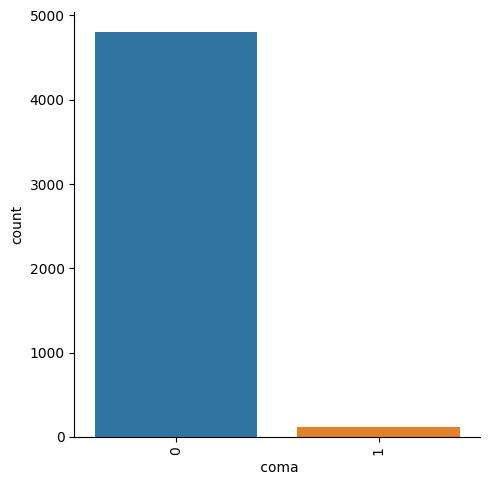

 congestion


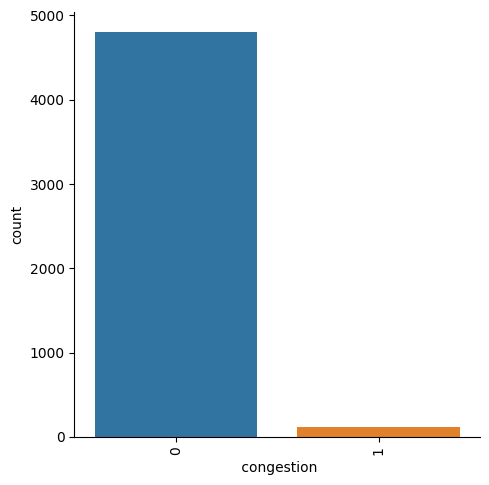

 constipation


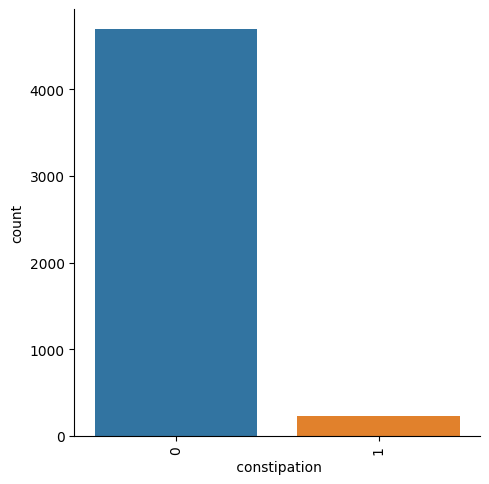

 continuous feel of urine


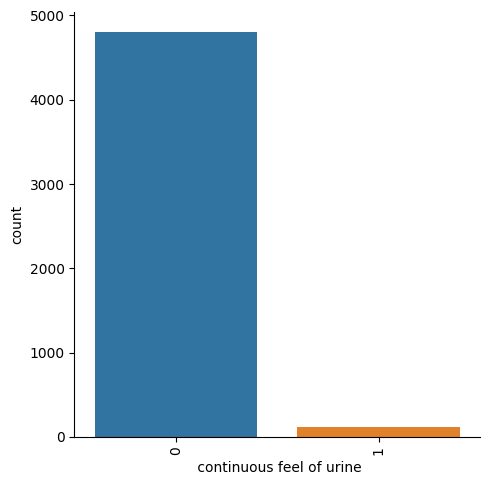

 continuous sneezing


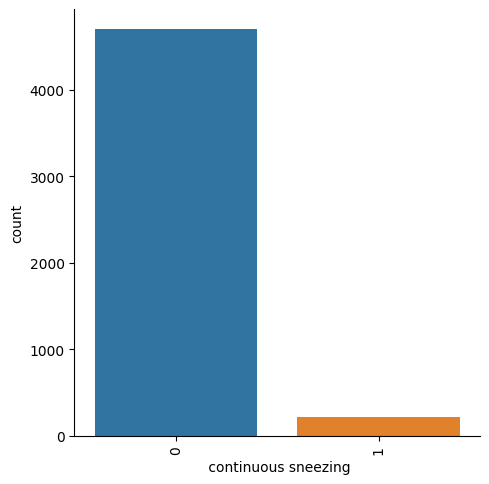

 cough


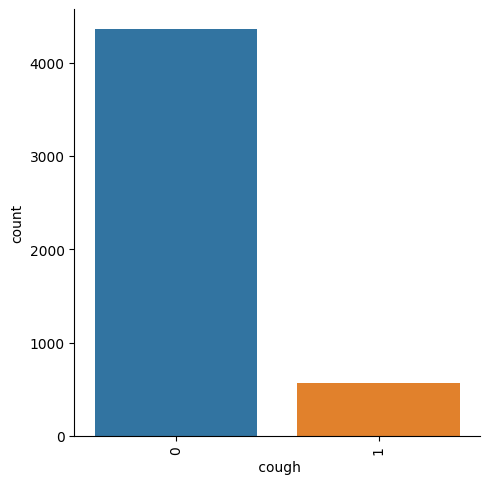

 cramps


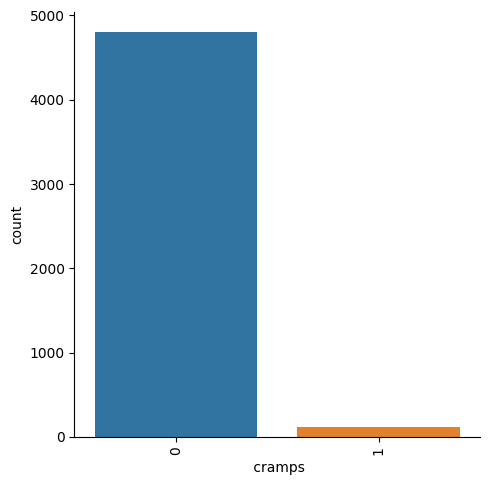

 dark urine


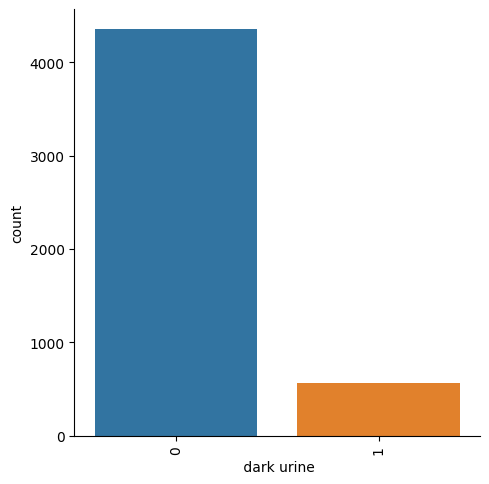

 dehydration


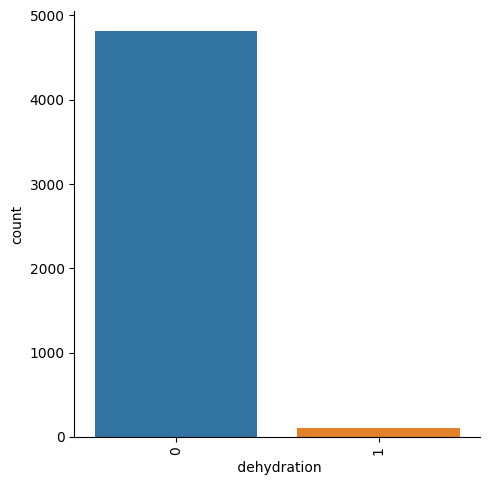

 depression


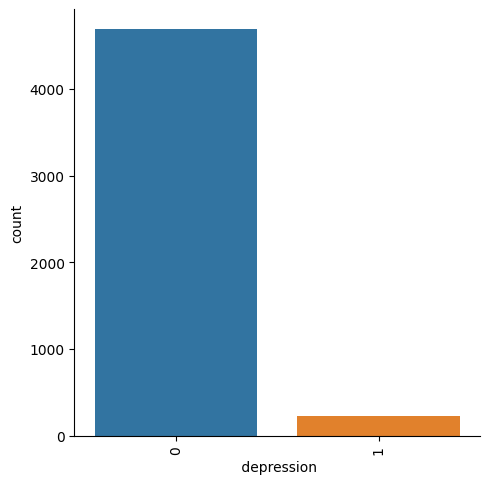

 diarrhoea


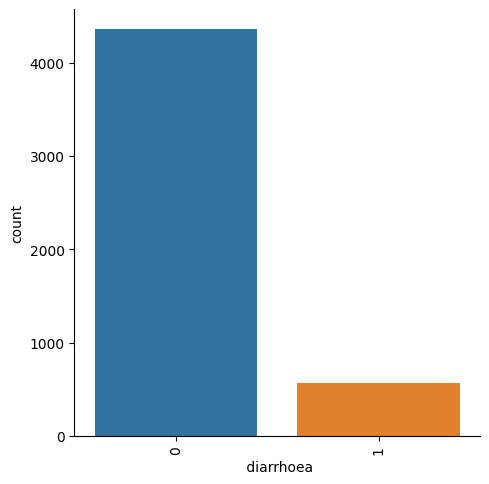

 dischromic  patches


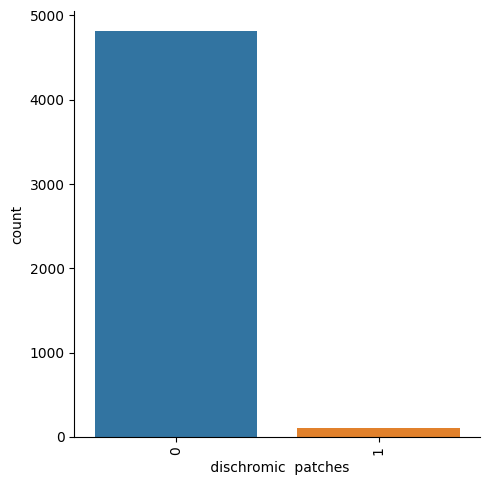

 distention of abdomen


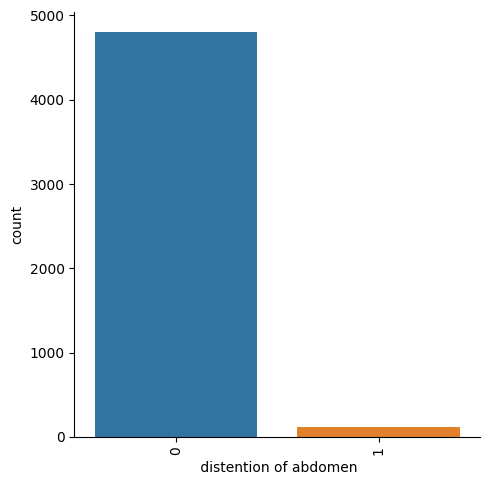

 dizziness


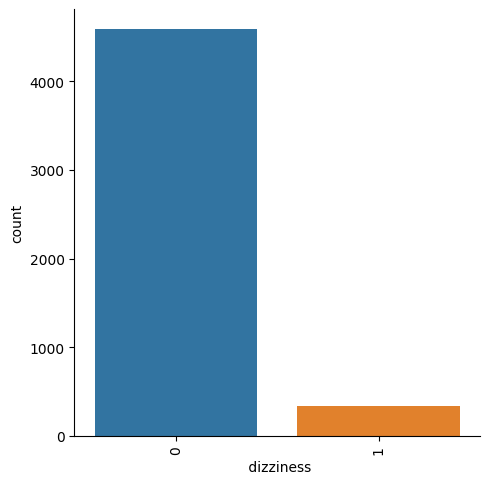

 drying and tingling lips


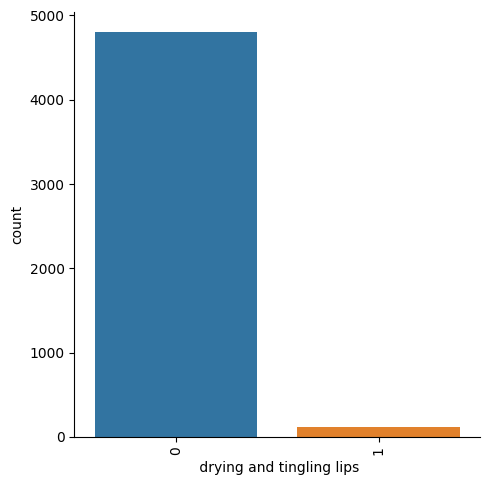

 enlarged thyroid


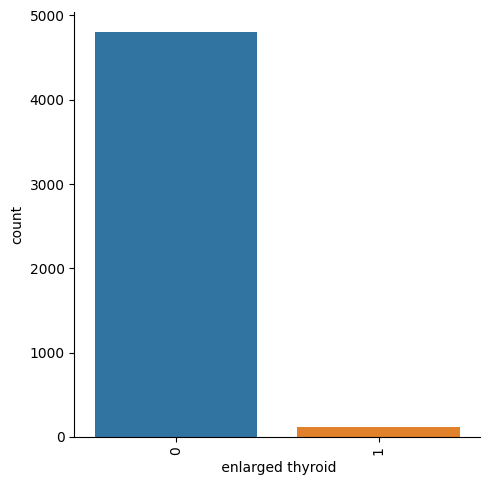

 excessive hunger


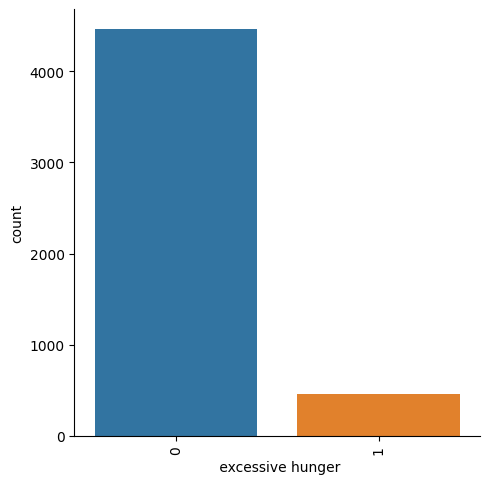

 extra marital contacts


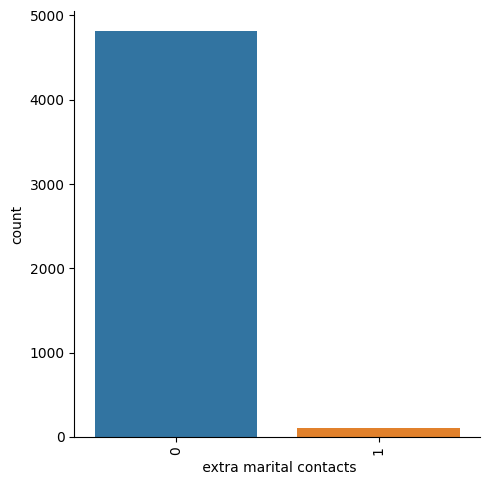

 family history


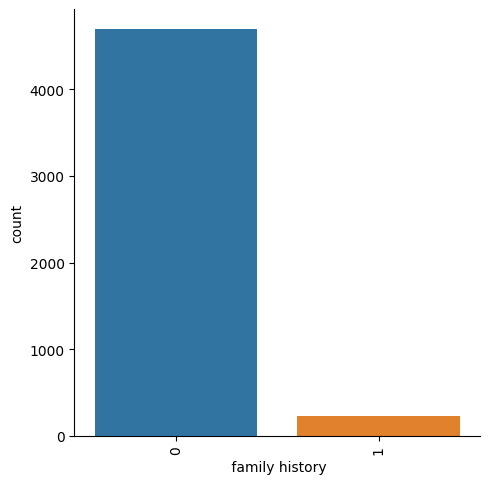

 fast heart rate


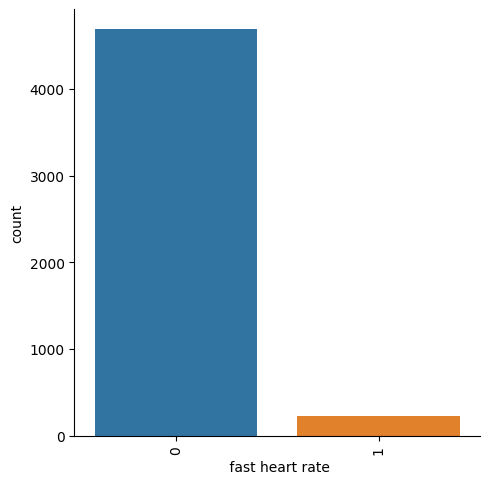

 fatigue


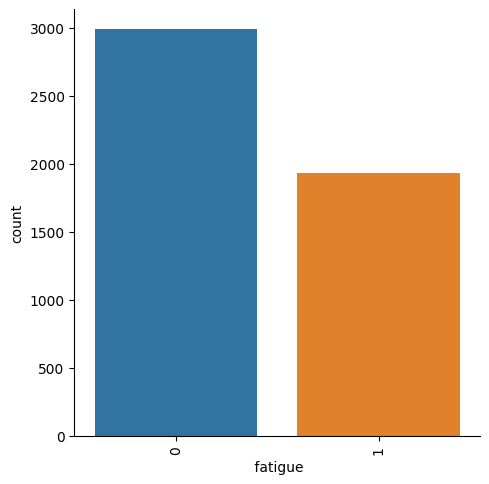

 fluid overload


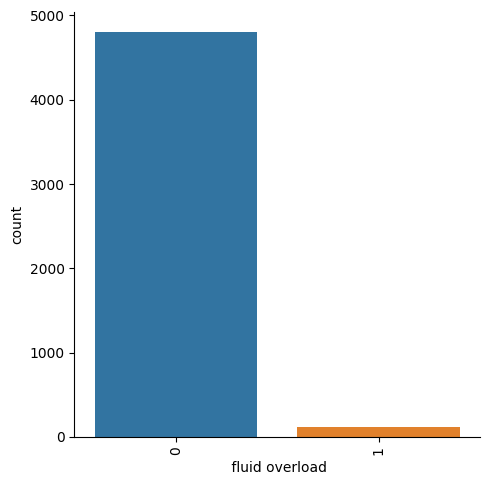

 foul smell of urine


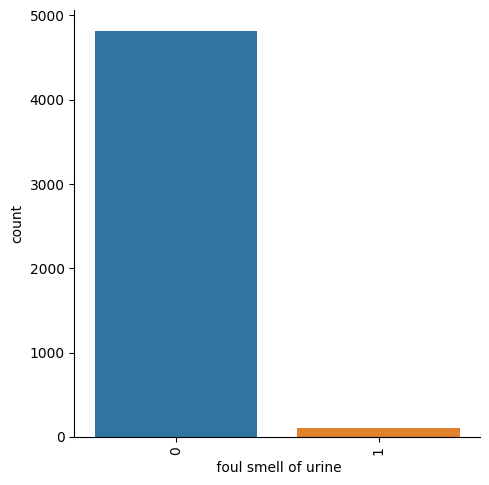

 headache


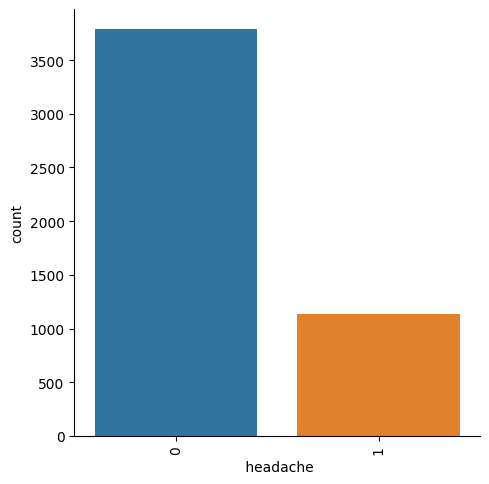

 high fever


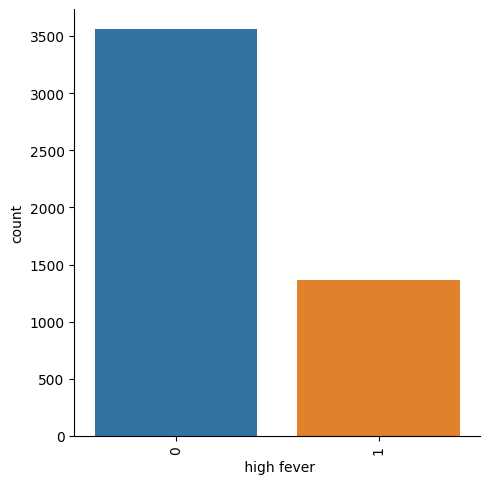

 hip joint pain


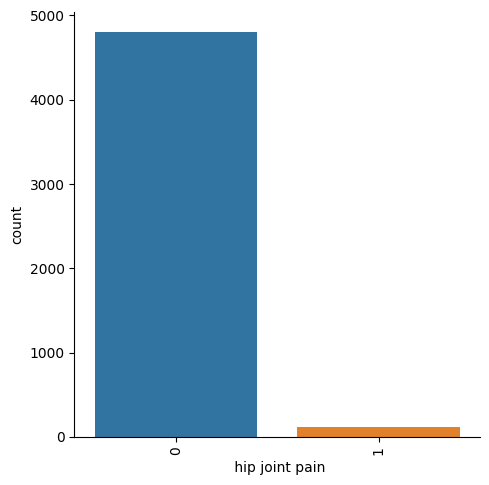

 history of alcohol consumption


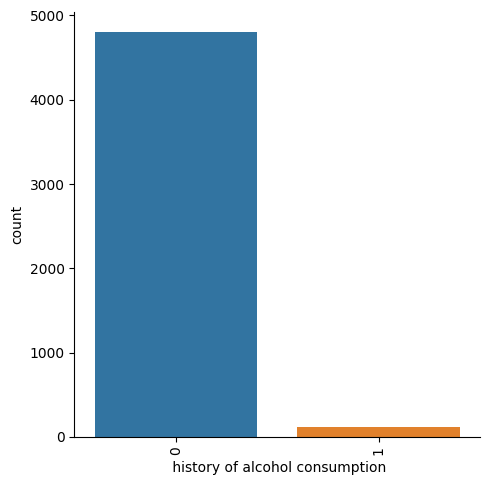

 increased appetite


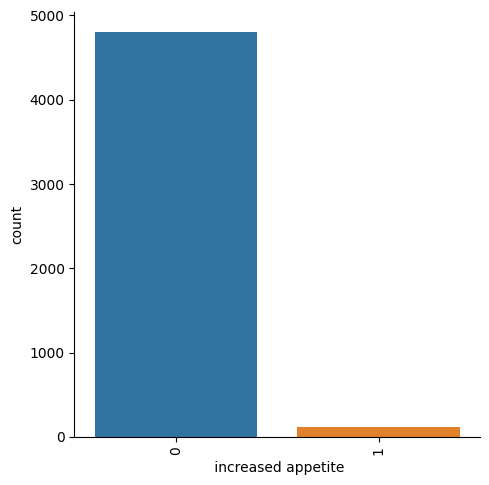

 indigestion


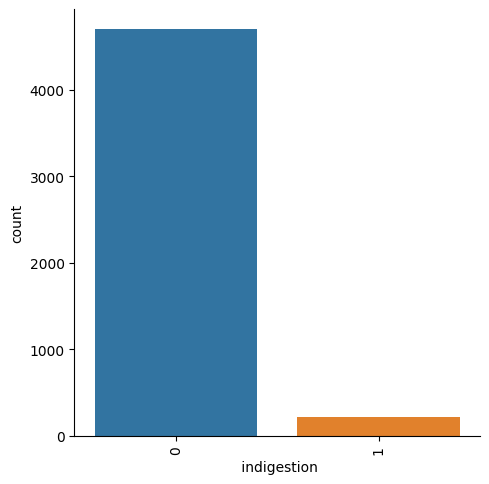

 inflammatory nails


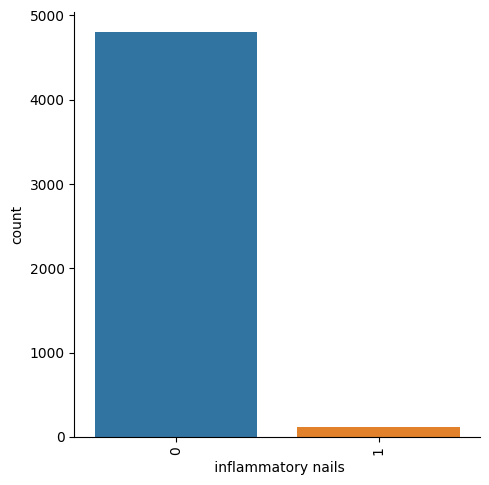

 internal itching


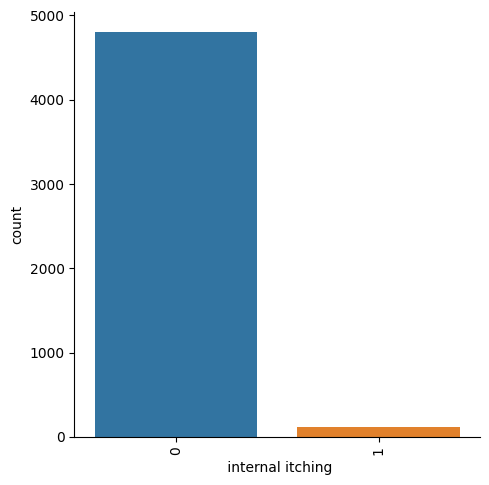

 irregular sugar level


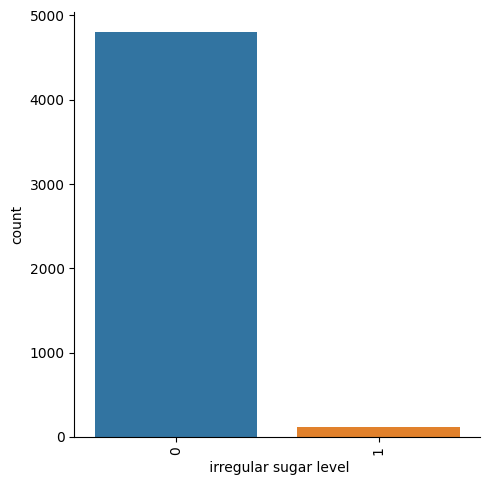

 irritability


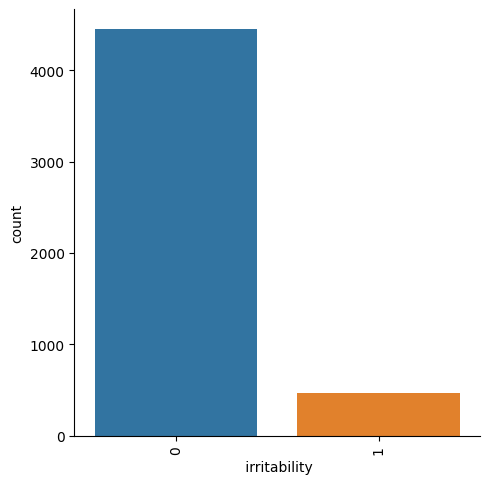

 irritation in anus


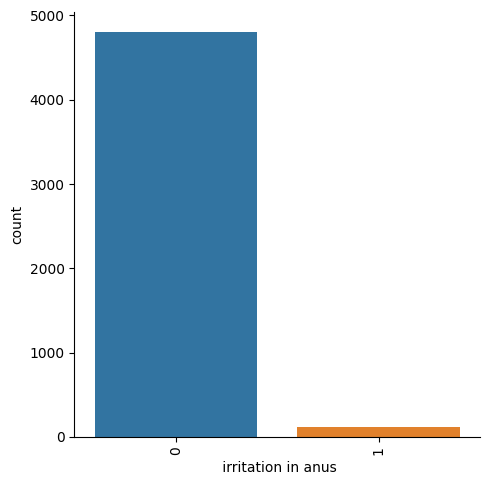

 joint pain


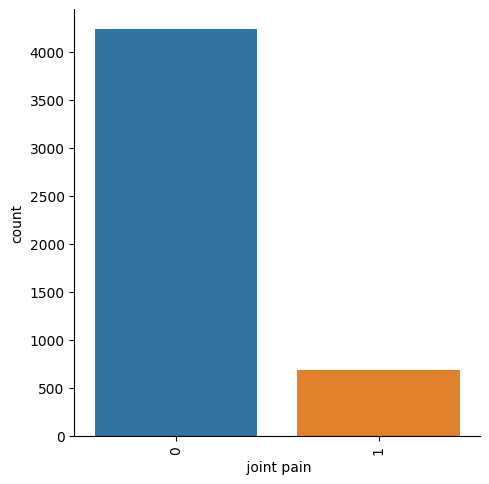

 knee pain


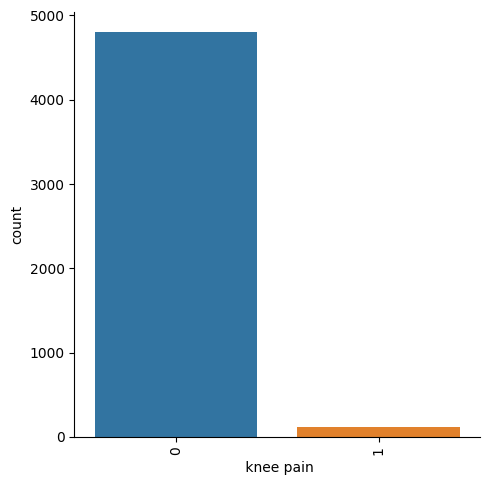

 lack of concentration


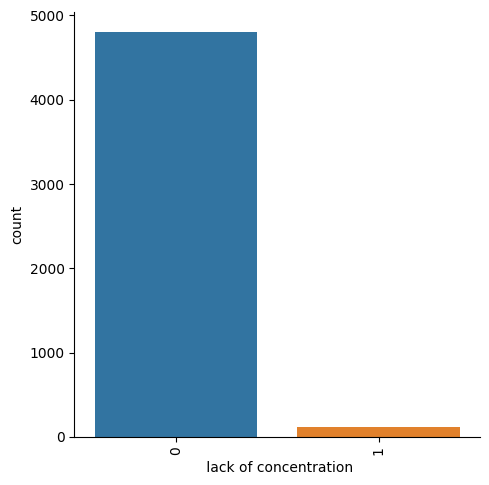

 lethargy


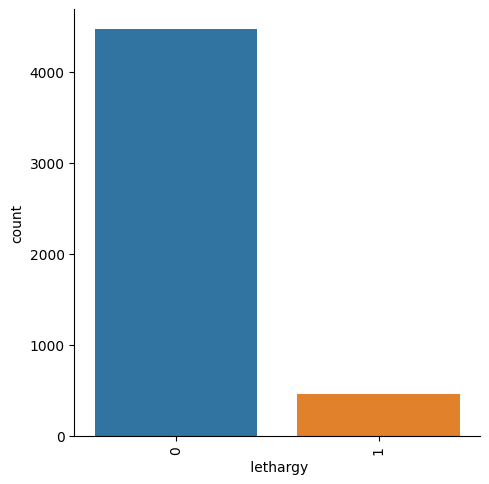

 loss of appetite


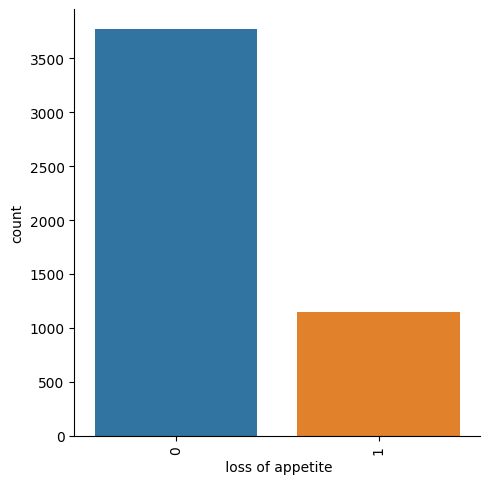

 loss of balance


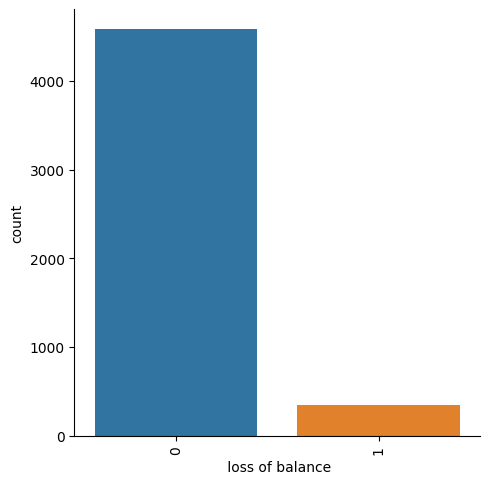

 loss of smell


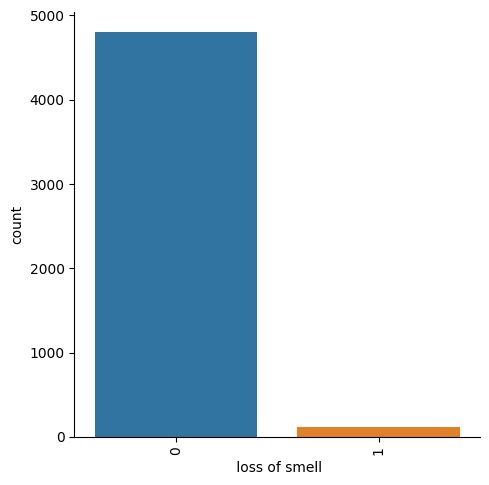

 malaise


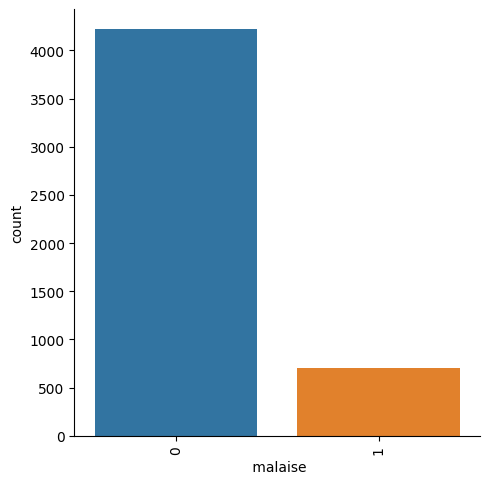

 mild fever


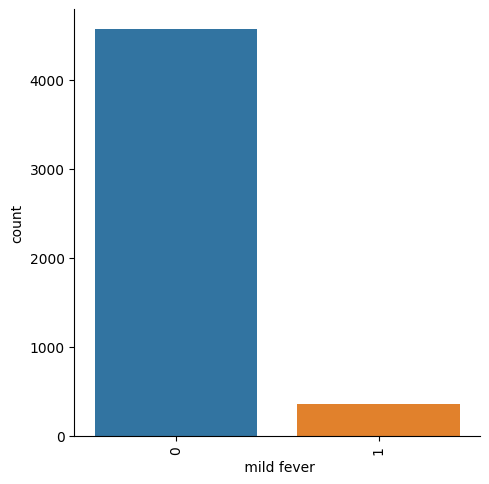

 mood swings


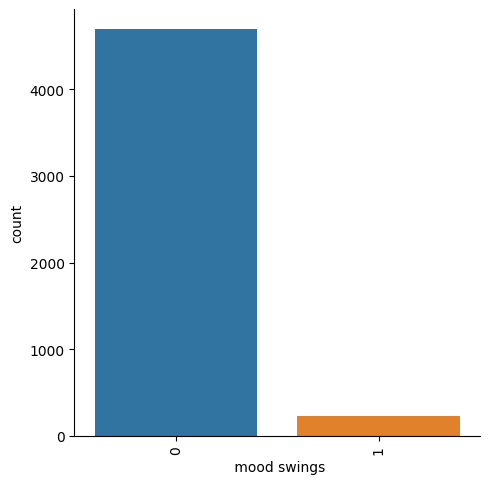

 movement stiffness


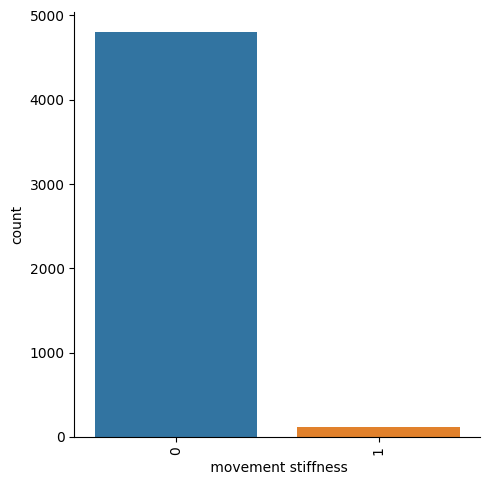

 mucoid sputum


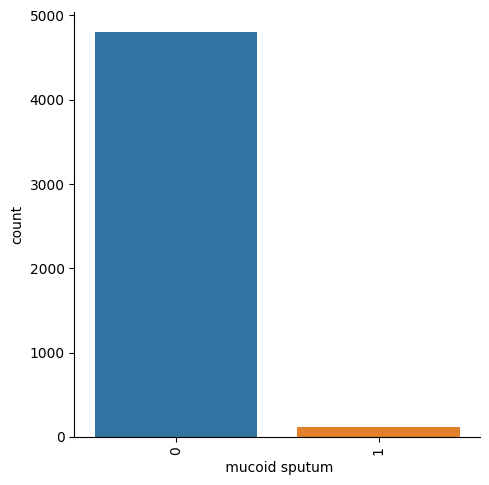

 muscle pain


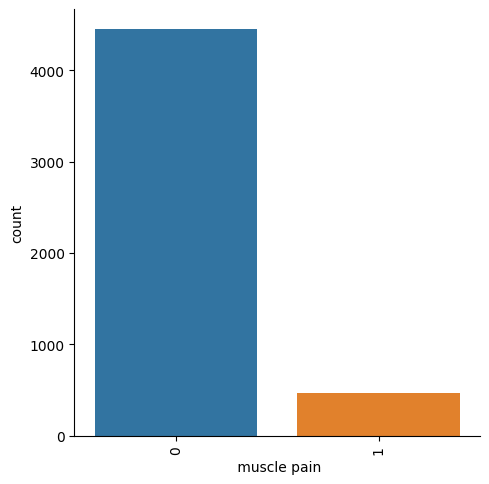

 muscle wasting


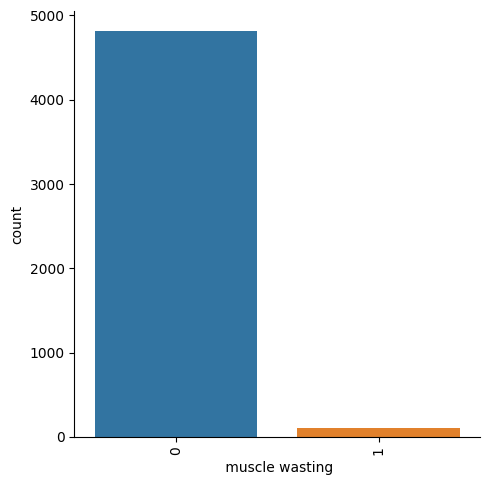

 muscle weakness


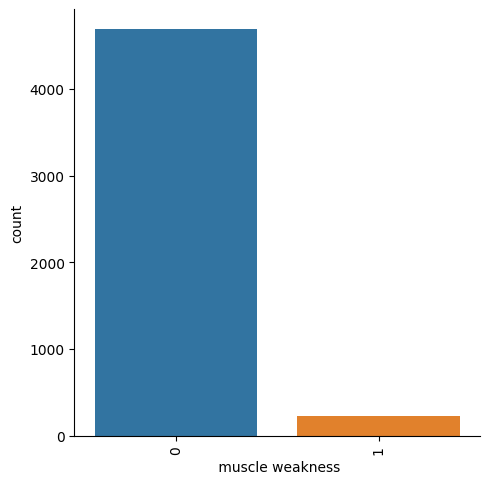

 nausea


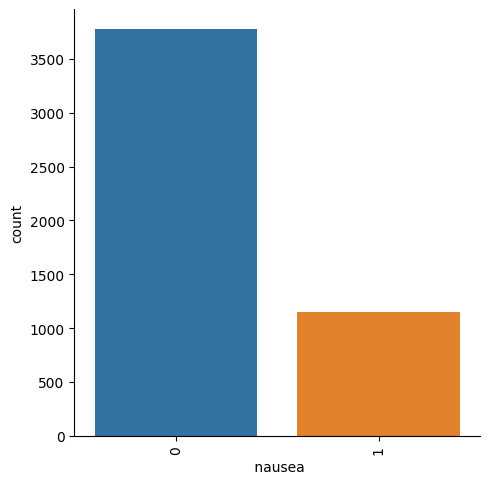

 neck pain


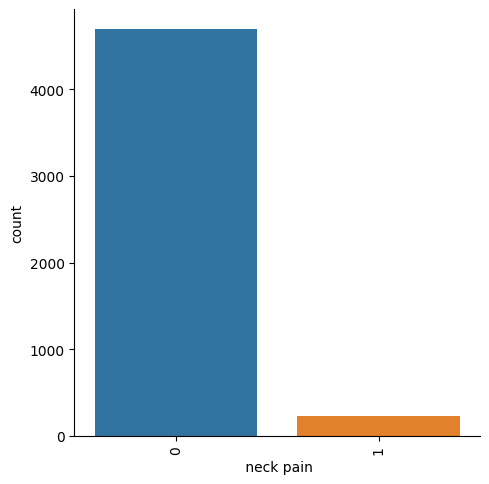

 nodal skin eruptions


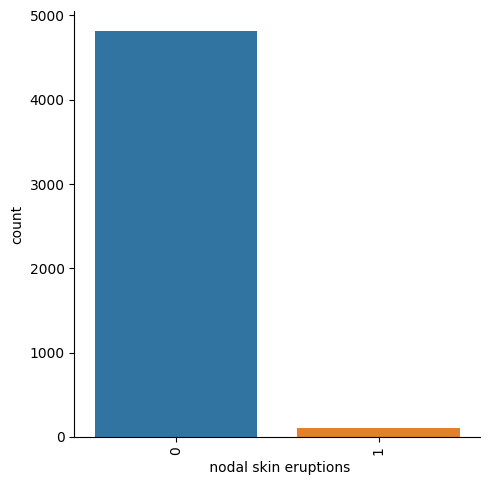

 obesity


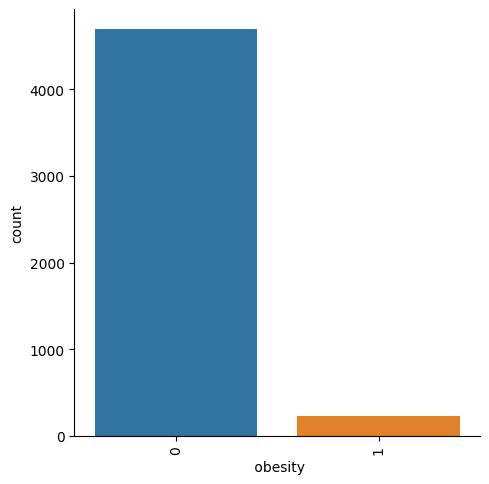

 pain behind the eyes


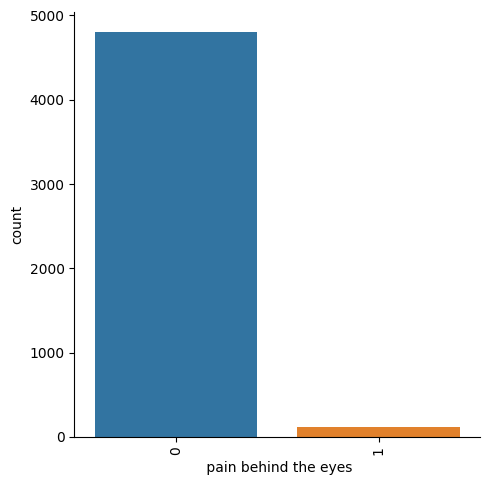

 pain during bowel movements


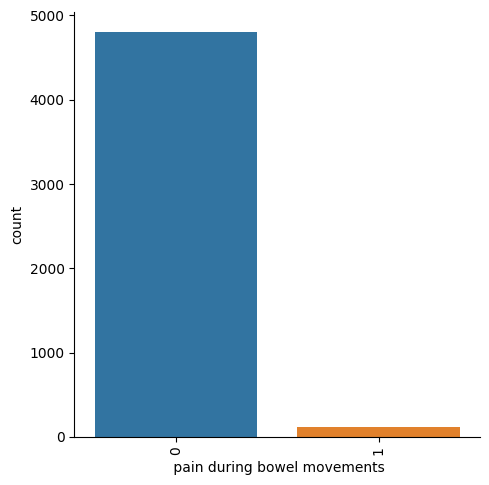

 pain in anal region


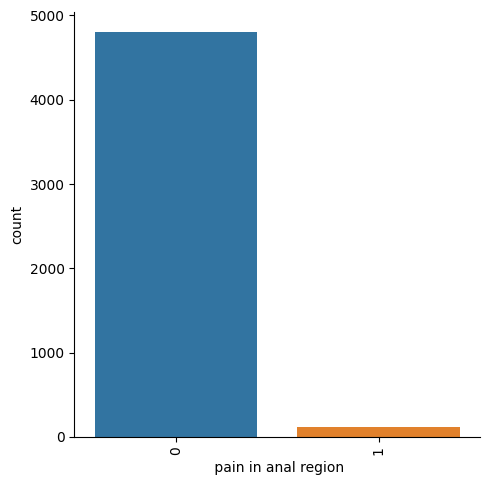

 painful walking


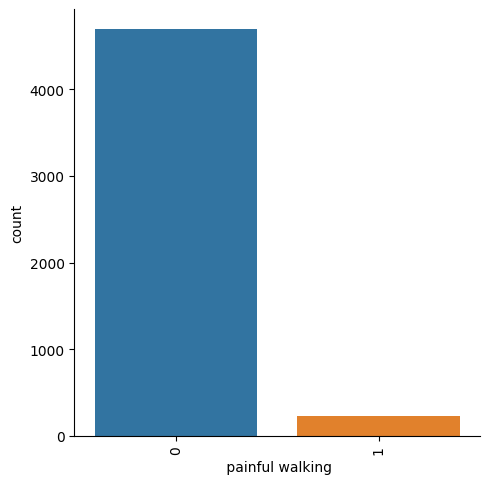

 palpitations


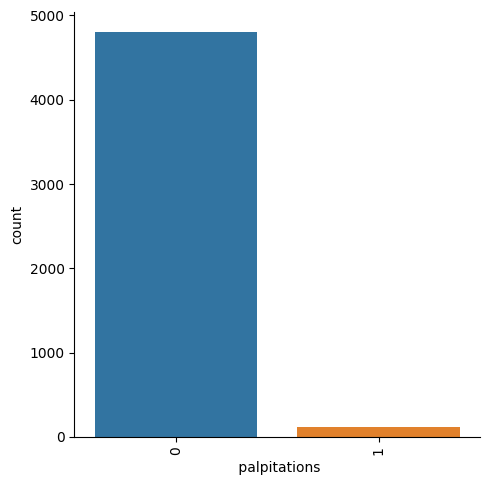

 passage of gases


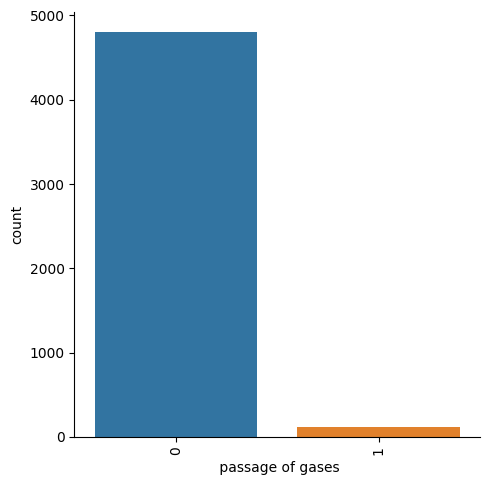

 patches in throat


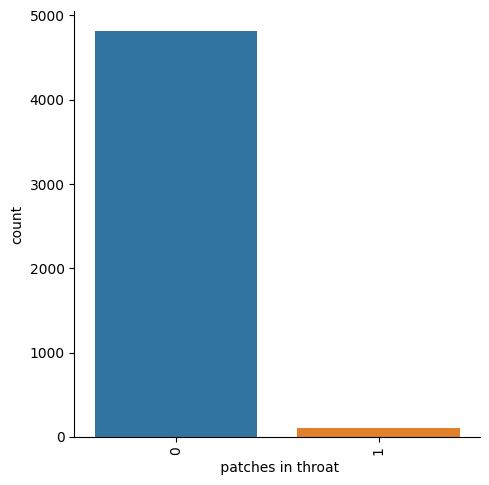

 phlegm


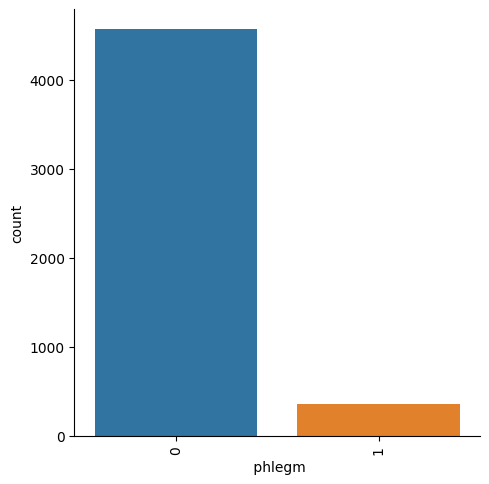

 polyuria


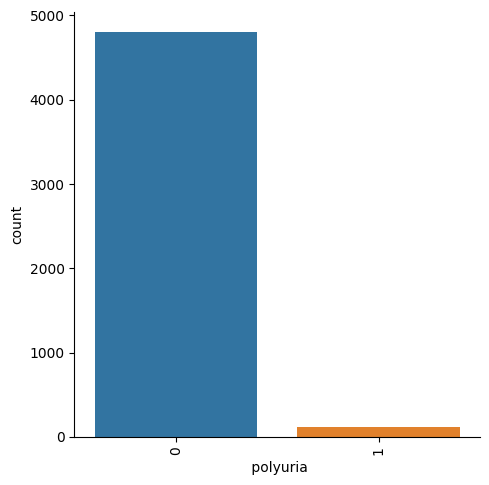

 prominent veins on calf


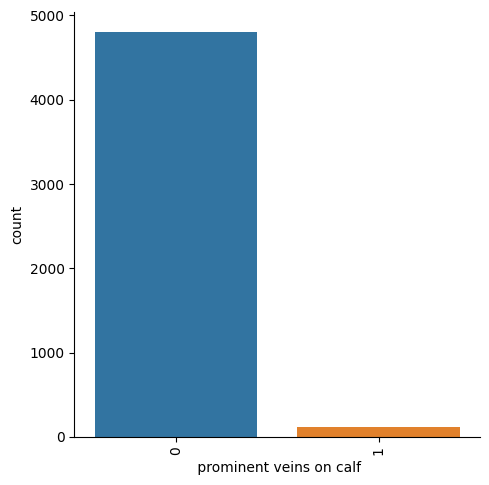

 puffy face and eyes


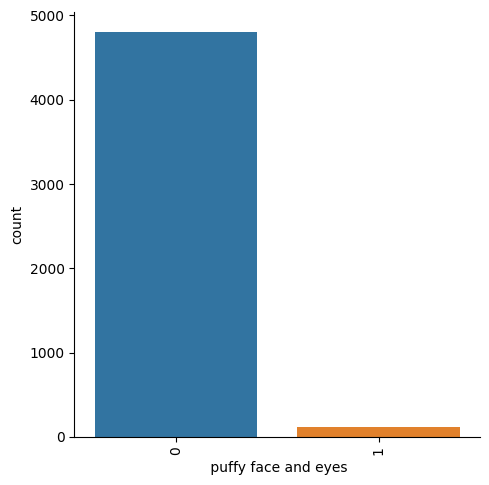

 pus filled pimples


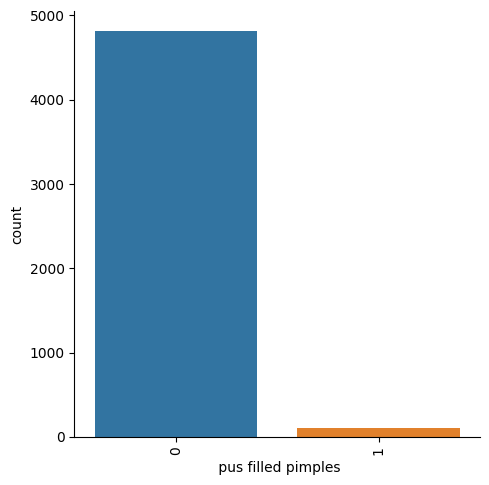

 receiving blood transfusion


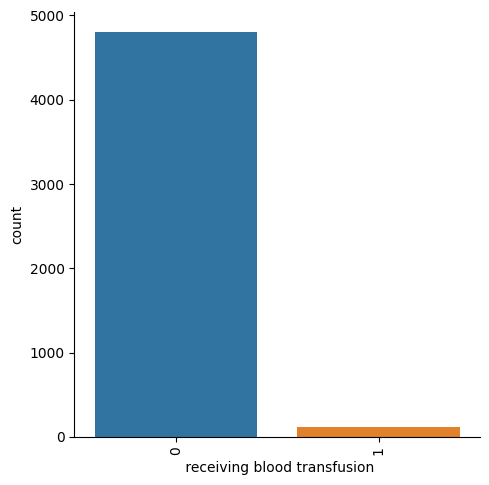

 receiving unsterile injections


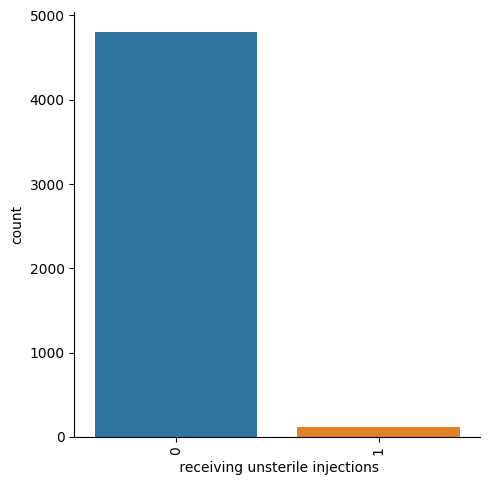

 red sore around nose


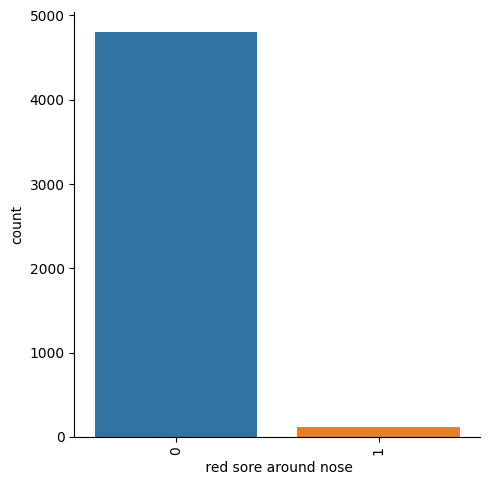

 red spots over body


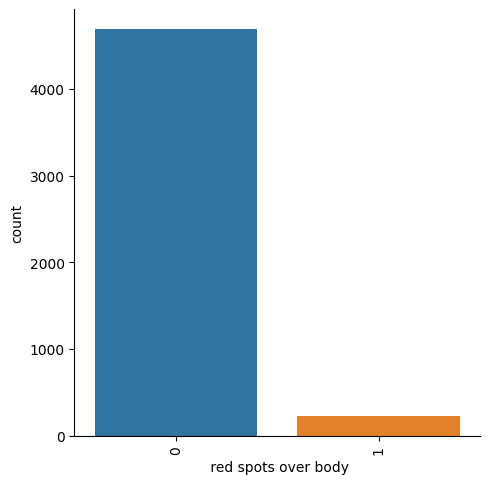

 redness of eyes


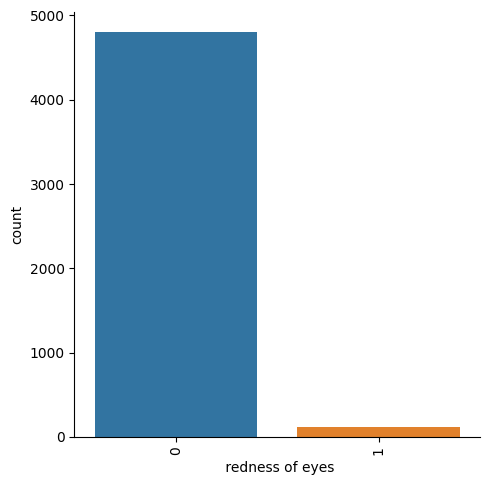

 restlessness


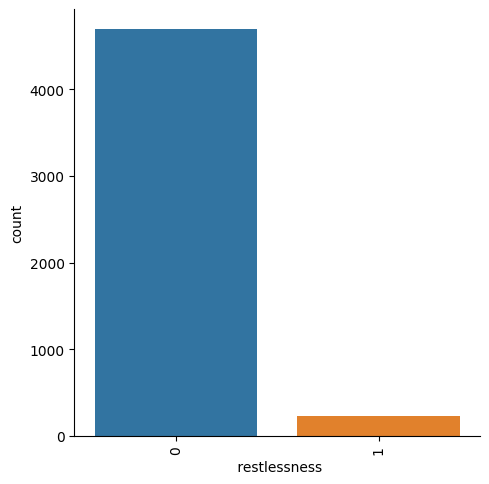

 runny nose


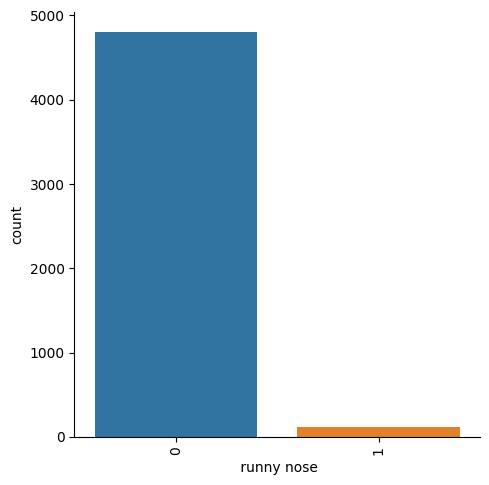

 rusty sputum


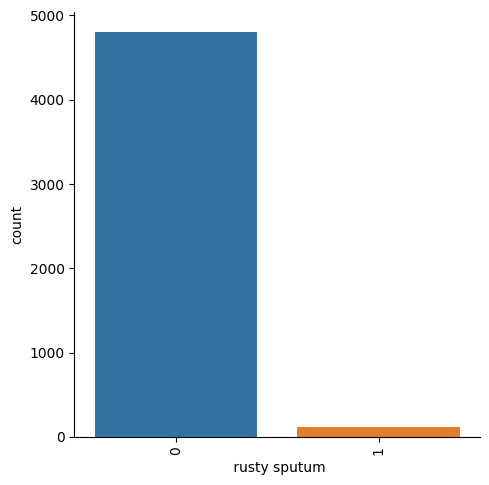

 scurring


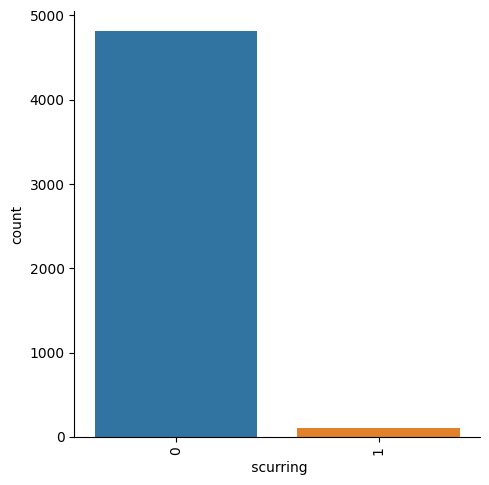

 shivering


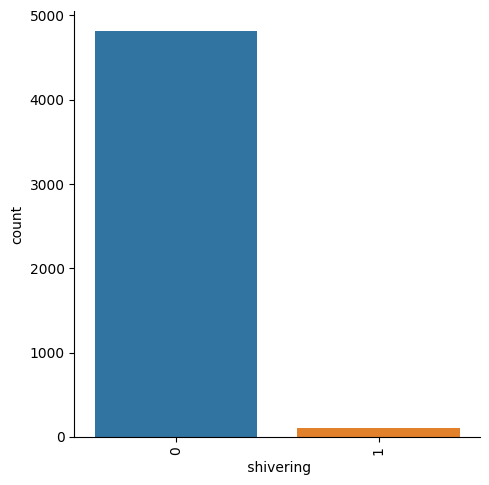

 silver like dusting


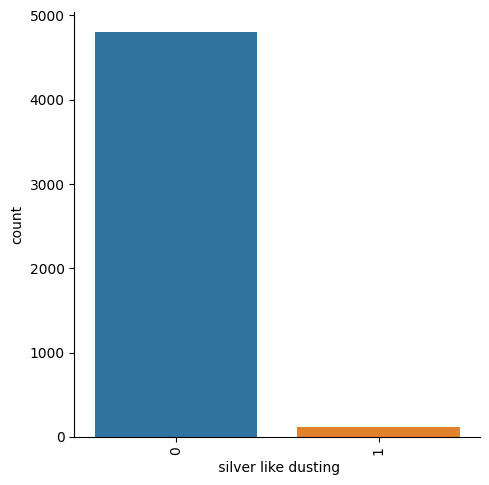

 sinus pressure


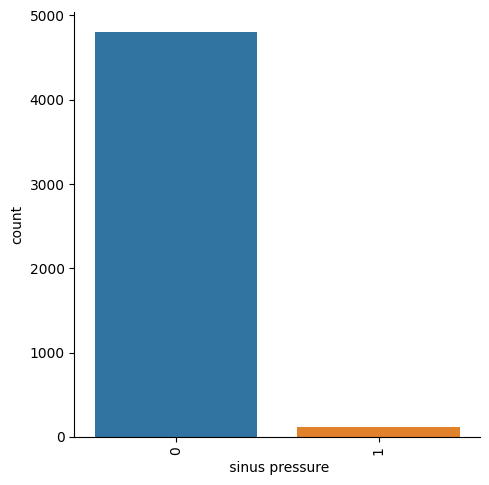

 skin peeling


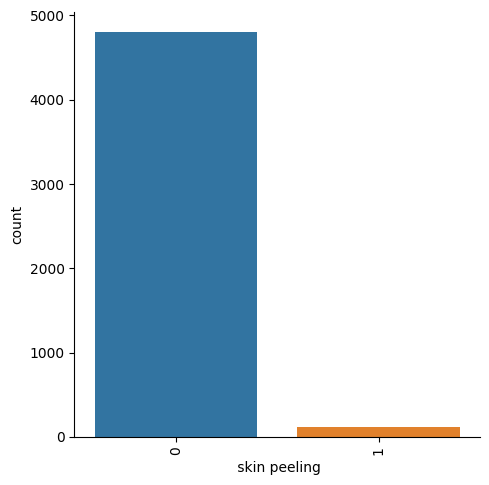

 skin rash


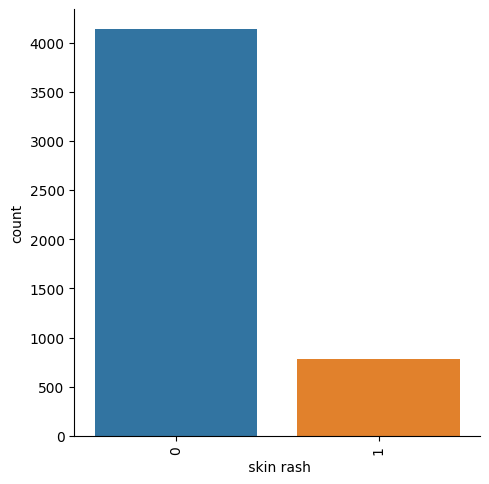

 slurred speech


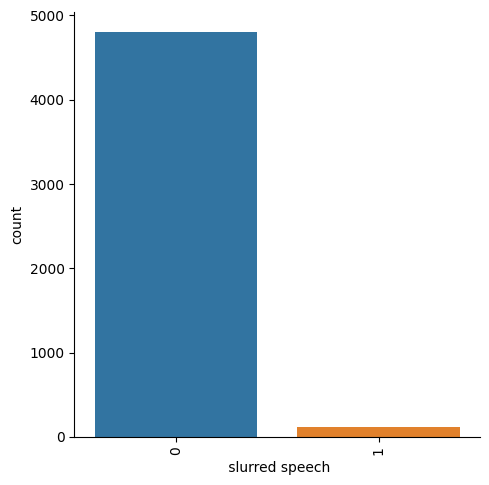

 small dents in nails


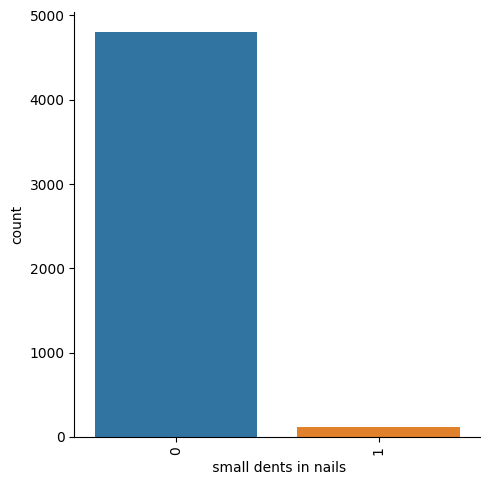

 spinning movements


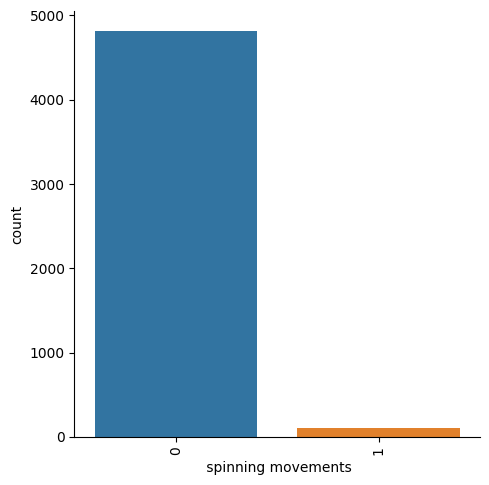

 spotting  urination


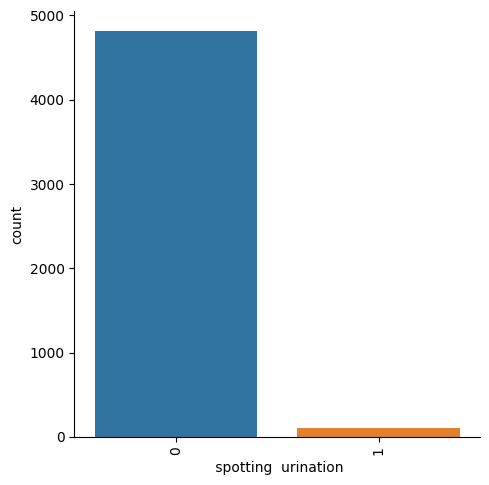

 stiff neck


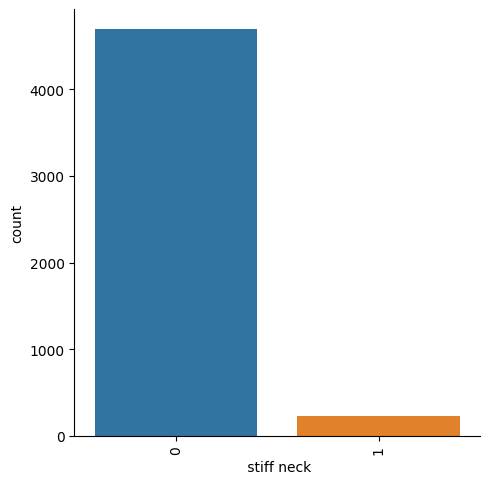

 stomach bleeding


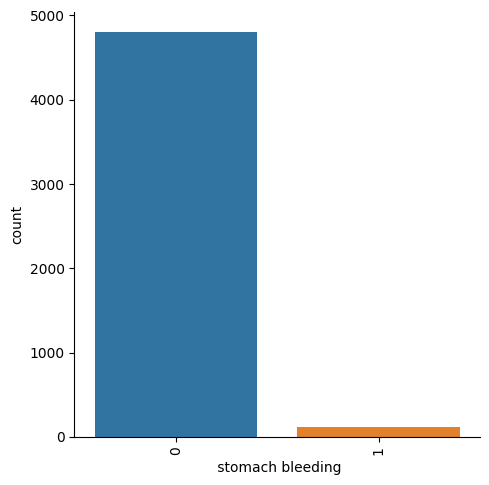

 stomach pain


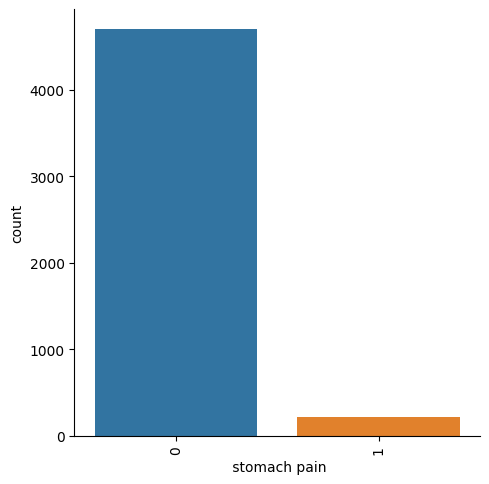

 sunken eyes


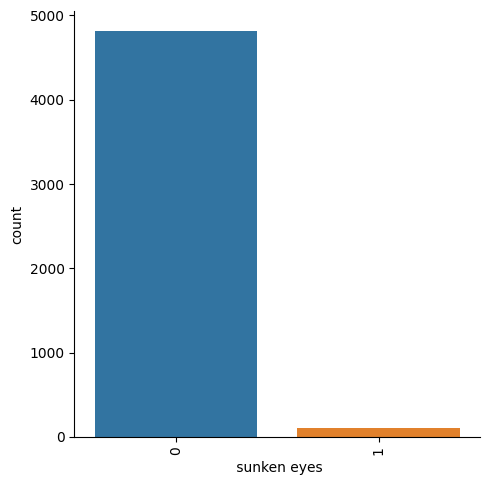

 sweating


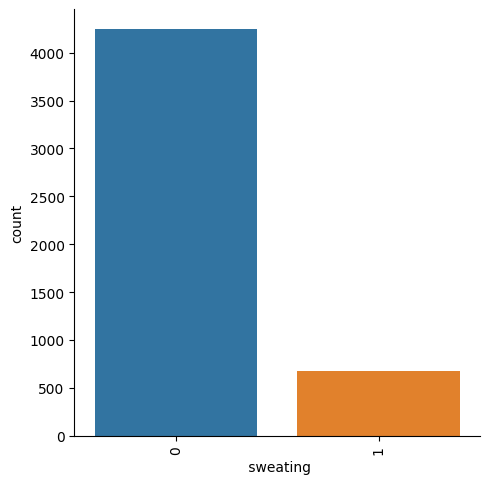

 swelled lymph nodes


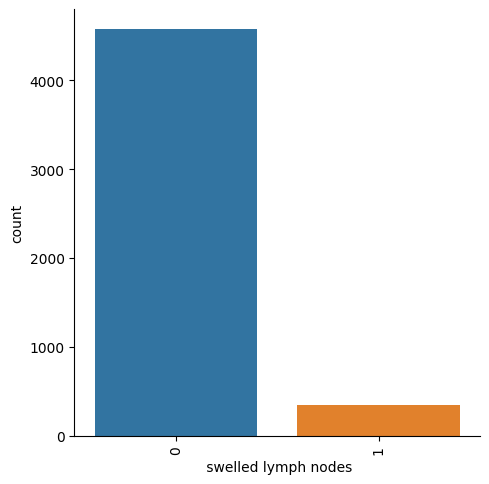

 swelling joints


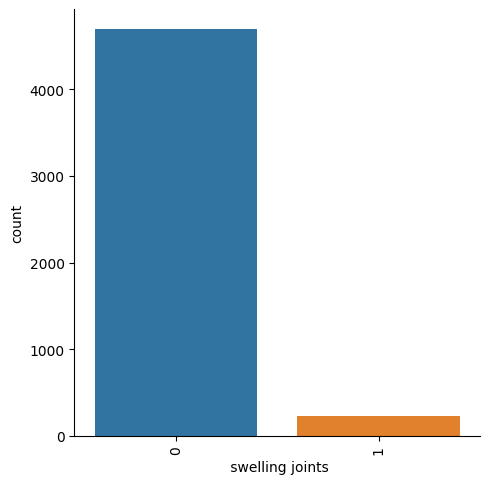

 swelling of stomach


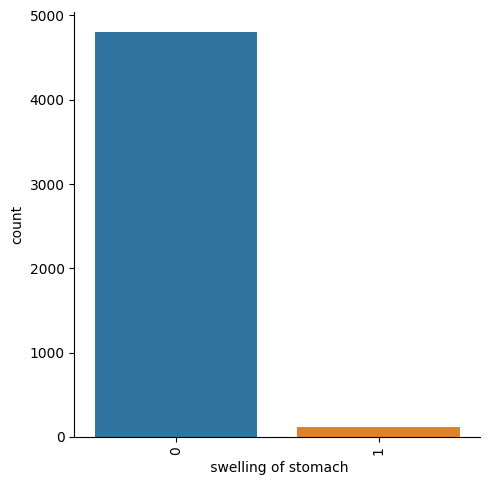

 swollen blood vessels


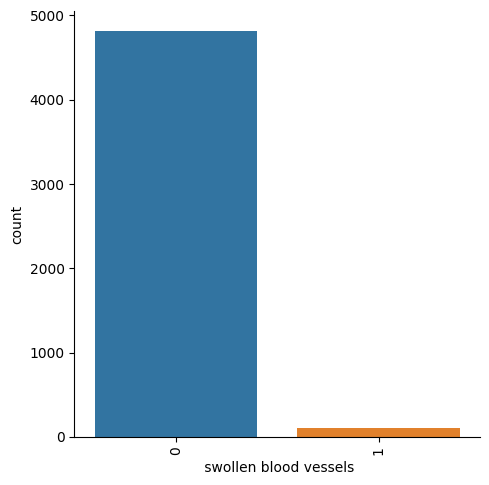

 swollen extremeties


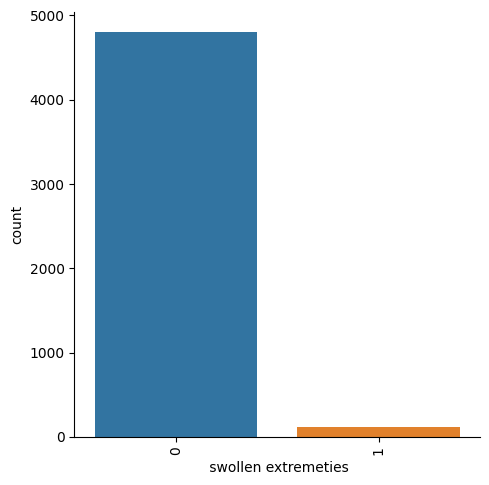

 swollen legs


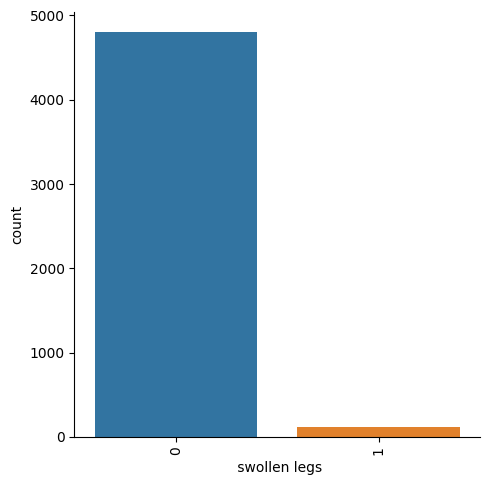

 throat irritation


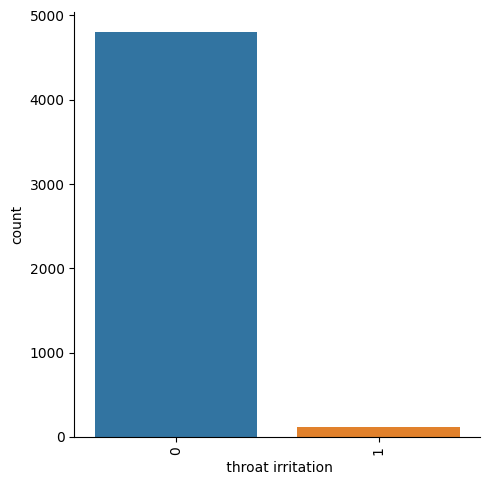

 toxic look (typhos)


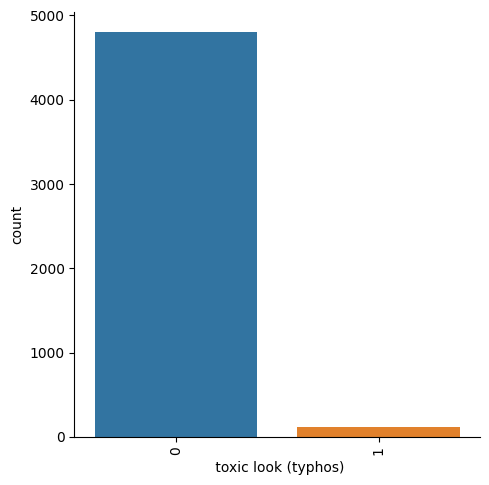

 ulcers on tongue


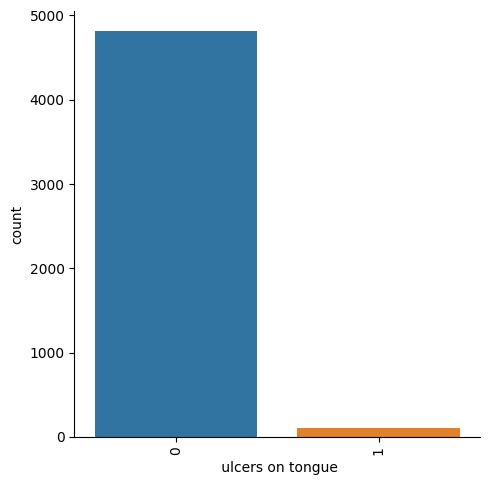

 unsteadiness


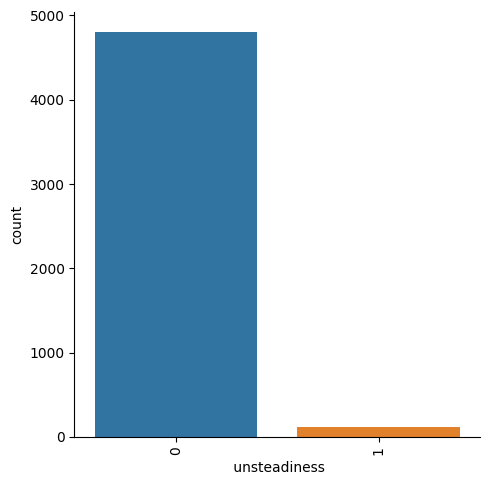

 visual disturbances


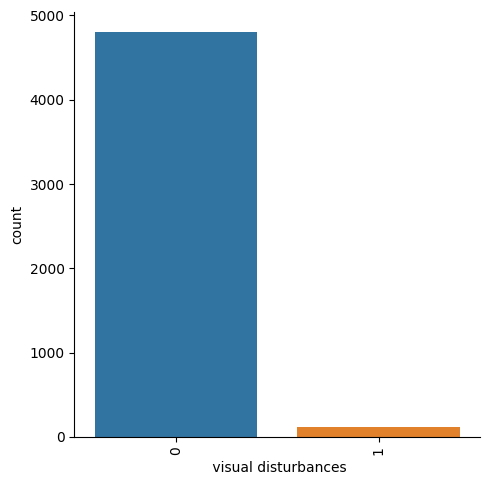

 vomiting


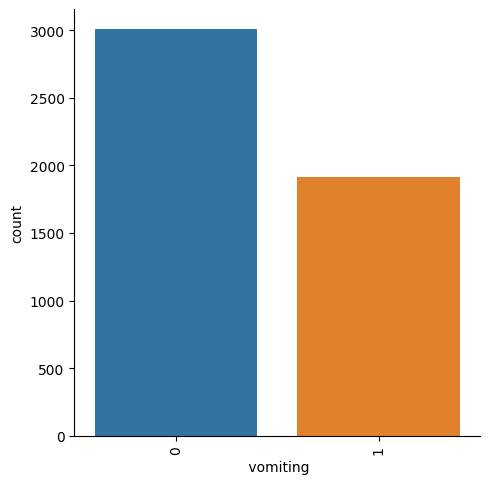

 watering from eyes


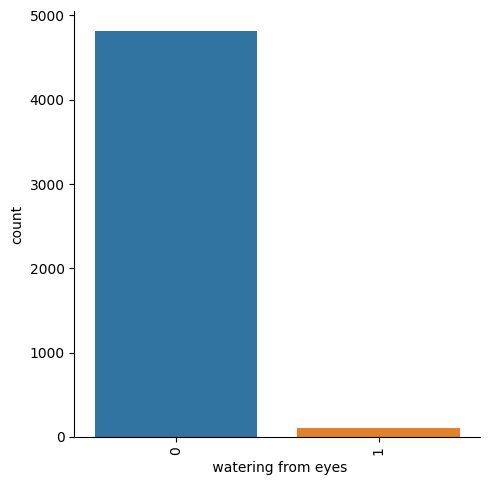

 weakness in limbs


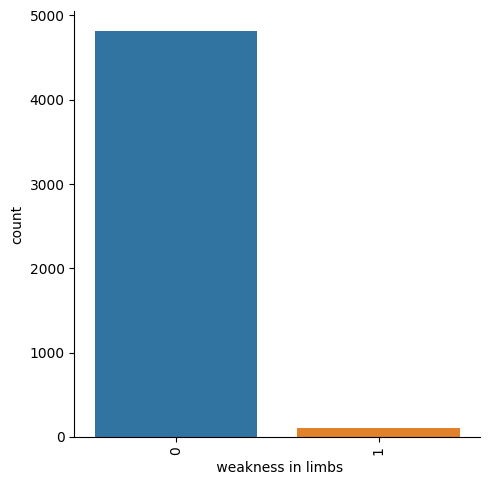

 weakness of one body side


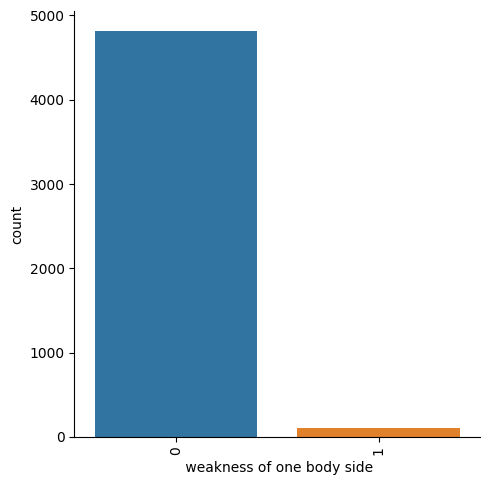

 weight gain


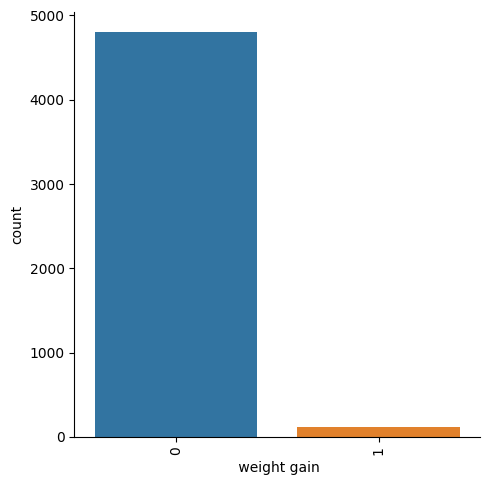

 weight loss


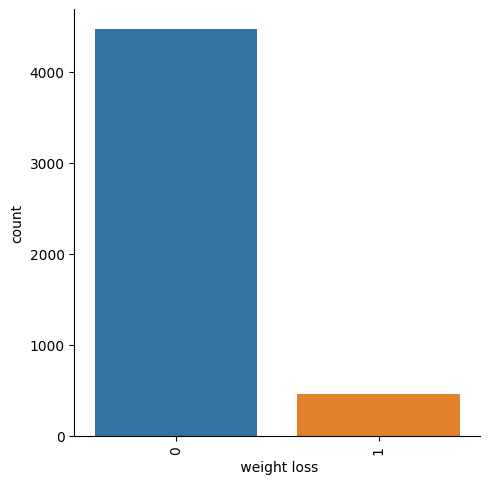

 yellow crust ooze


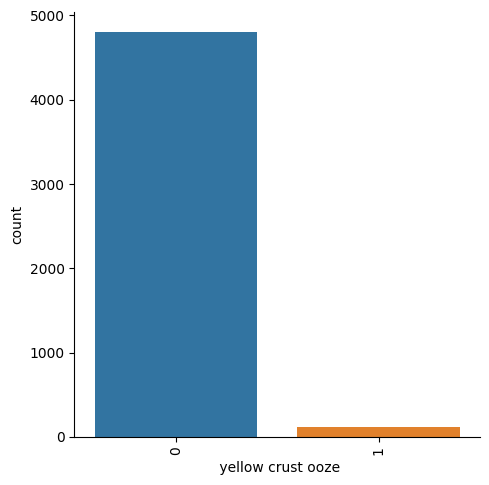

 yellow urine


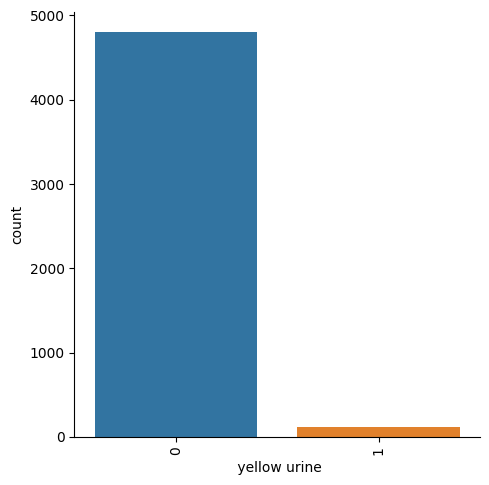

 yellowing of eyes


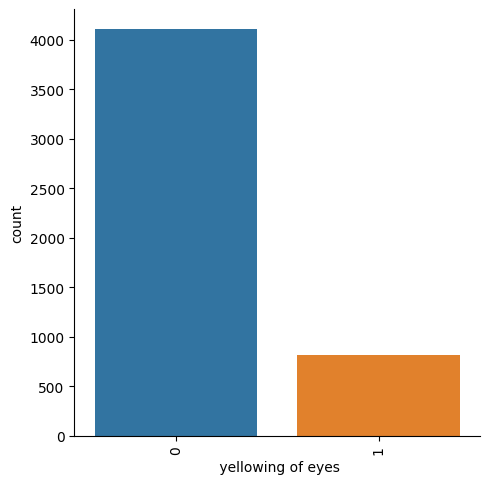

 yellowish skin


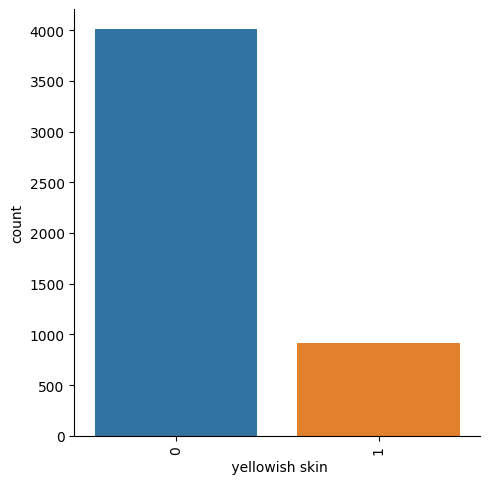

itching


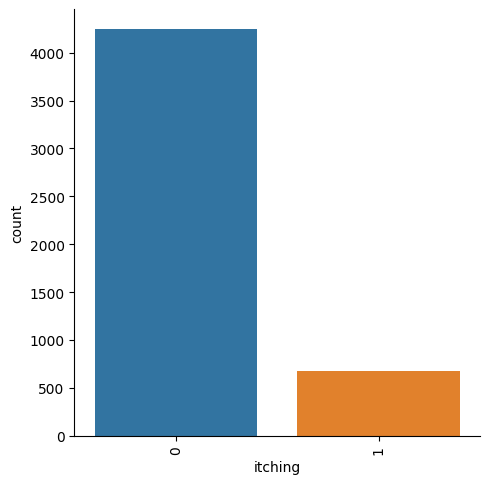

In [29]:
for col in y.columns[1:]:
    print(col)
    sns.catplot(x=col , kind="count",data=y)
    plt.xticks(rotation='vertical')
    plt.show()

In [30]:
y['Disease']=df.Disease

In [31]:
y.to_csv('pre_processed.csv',index=False)

In [32]:
y.corr()

abdominal pain   abnormal menstruation   acidity  \
 abdominal pain                1.000000               -0.116670 -0.111995   
 abnormal menstruation        -0.116670                1.000000 -0.049227   
 acidity                      -0.111995               -0.049227  1.000000   
 acute liver failure           0.298940               -0.034877 -0.033480   
 altered sensorium            -0.079348               -0.034877 -0.033480   
...                                 ...                     ...       ...   
 yellow crust ooze            -0.079348               -0.034877 -0.033480   
 yellow urine                  0.279030               -0.034877 -0.033480   
 yellowing of eyes             0.527264               -0.100977 -0.096931   
 yellowish skin                0.733180               -0.108023 -0.103694   
itching                        0.263282               -0.090534 -0.086906   

                         acute liver failure   altered sensorium   anxiety  \
 abdominal pain                     0.298940           -0.079348 -0.079348   
 abnormal menstruation             -0.034877           -0.034877 -0.034877   
 acidity                           -0.033480           -0.033480 -0.033480   
 acute liver failure                1.000000           -0.023720 -0.023720   
 altered sensorium                 -0.023720            1.000000 -0.023720   
...                                      ...                 ...       ...   
 yellow crust ooze                 -0.023720           -0.023720 -0.023720   
 yellow urine                      -0.023720           -0.023720 -0.023720   
 yellowing of eyes                  0.345397           -0.068676 -0.068676   
 yellowish skin                     0.302010           -0.073467 -0.073467   
itching                            -0.061573           -0.061573 -0.061573   

                         back pain   belly pain   blackheads  \
 abdominal pain          -0.113570     0.279030    -0.077184   
 abnormal menstruation   -0.049920    -0.034877    -0.033926   
 acidity                 -0.047919    -0.033480    -0.032566   
 acute liver failure     -0.033951    -0.023720    -0.023073   
 altered sensorium       -0.033951    -0.023720    -0.023073   
...                            ...          ...          ...   
 yellow crust ooze       -0.033951    -0.023720    -0.023073   
 yellow urine            -0.033951    -0.023720    -0.023073   
 yellowing of eyes       -0.098295    -0.068676    -0.066802   
 yellowish skin          -0.105153    -0.073467    -0.071463   
itching                  -0.088129    -0.061573    -0.059893   

                         bladder discomfort  ...   watering from eyes  \
 abdominal pain                   -0.079348  ...            -0.077184   
 abnormal menstruation            -0.034877  ...            -0.033926   
 acidity                          -0.033480  ...            -0.032566   
 acute liver failure              -0.023720  ...            -0.023073   
 altered sensorium                -0.023720  ...            -0.023073   
...                                     ...  ...                  ...   
 yellow crust ooze                -0.023720  ...            -0.023073   
 yellow urine                     -0.023720  ...            -0.023073   
 yellowing of eyes                -0.068676  ...            -0.066802   
 yellowish skin                   -0.073467  ...            -0.071463   
itching                           -0.061573  ...            -0.059893   

                         weakness in limbs   weakness of one body side  \
 abdominal pain                  -0.077184                   -0.077184   
 abnormal menstruation           -0.033926                   -0.033926   
 acidity                         -0.032566                   -0.032566   
 acute liver failure             -0.023073                   -0.023073   
 altered sensorium               -0.023073                    0.917400   
...                                    ...                         ...   

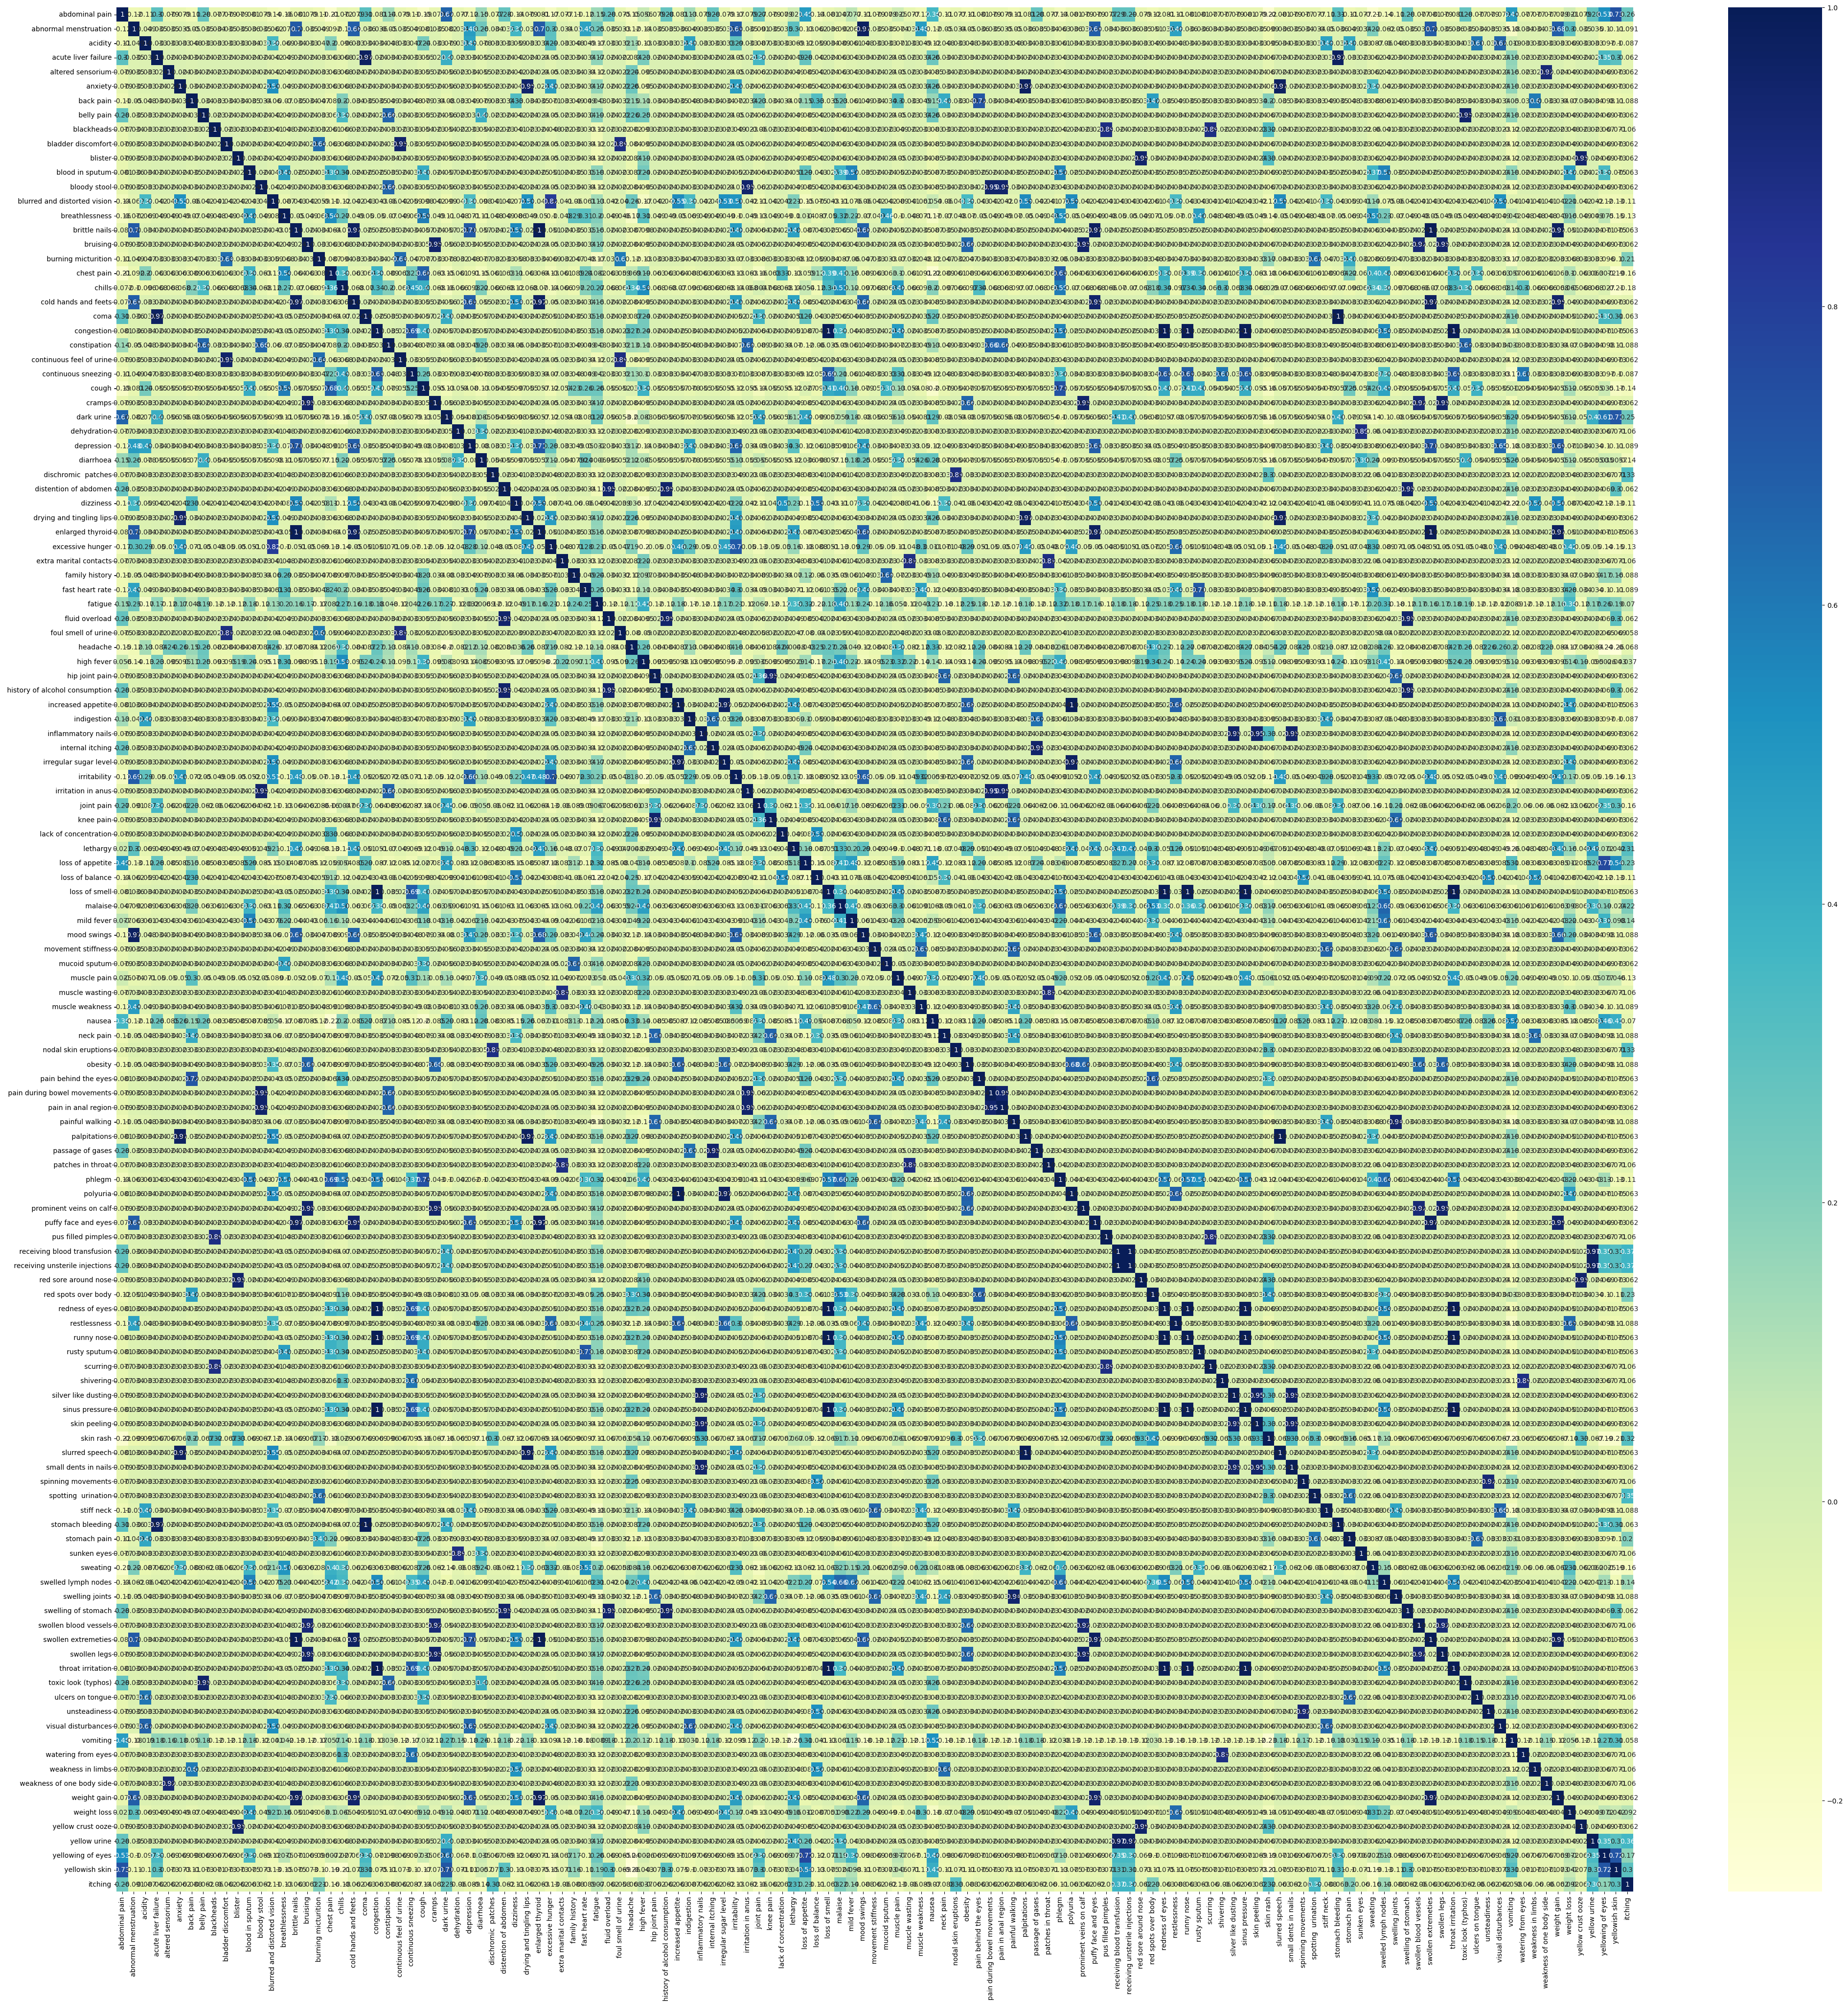

In [33]:
plt.figure(figsize=(50,50))
sns.heatmap(y.corr(), cmap="YlGnBu", annot=True)
plt.show()